# File to explore time dependant data and create (preliminary plots)

## Extract times, create run scripts(!) and space for more

In [1]:
# Extract simulation times for all snapshots (finished functions in co5bold-data folder)
from scipy.io.idl import readsav

# Path to folder with sav-files
path = '/media/joachim/T7 Shield/exwings_archivedata/co5bold_data/dst28gm06n052/'


phases = [
    '181',
    '183',
    '185',
    '187',
    '189',
    '191',
    '193',
    '195',
    '197',
    '199',
    '201',
    '203',
    '205',
    '206',
    '207',
    '208',
    '209',
    '210',
    '211',
    '212',
]
yr = 3600*24*365.25
for phase in phases:
    stardata = readsav(f'{path}st28gm06n052_{phase}.sav')
    stardata = stardata['ful']

    # Time-step time
    print(phase)
    print(f"Current time?: {stardata['Z'][0][0][7]} {stardata['Z'][0][0][8]}")
    print(f"Current time?: {stardata['Z'][0][0][10]} {stardata['Z'][0][0][11]}")
    print(f"               {stardata['Z'][0][0][7]/yr} yrs")
    print(f"               {stardata['Z'][0][0][10]/yr} yrs")
    print()
print('Done')



/tmp/ipykernel_21079/2748285544.py:2: DeprecationWarning: Please use `readsav` from the `scipy.io` namespace, the `scipy.io.idl` namespace is deprecated.
  from scipy.io.idl import readsav
/home/joachim/.local/lib/python3.8/site-packages/scipy/io/_idl.py:465: UserWarning: Using experimental 64-bit array read
  warnings.warn("Using experimental 64-bit array read")


032
Current time?: 155001344.0 b's'
Current time?: 155001339.24389648 b's'
               4.911696199964509 yrs
               4.911696049252684 yrs



KeyboardInterrupt: 

In [3]:
# Create run-files
import create_r3d_functions as c3d


c3d.write_r3d_runscripts(
    path = '../r3dsims/st28gm06n074/',
    phase_list = [
        417,
        416,
        415,
        414,
        413,
        412,
        411,
        410,
        409,
        408,
        407
    ],
    sed_angles_list = [
        [0,0],
        [90,0],
        [180,0],
        [270,0],
        [90,90],
        [90,270],
    ],
    image_wavelength_list = [1,10],
    image_angles_list = [
        [0,0],
        [90,0],
        [180,0],
        [270,0],
        [90,90],
        [90,270],
    ],
    image_sizeau = 30,
    image_npix = 512,
    Nscripts = 1
)


Finished writing 11 run-r3d-scripts (dont forget > chmod +x on them)



## Remove spikes in SEDs and images

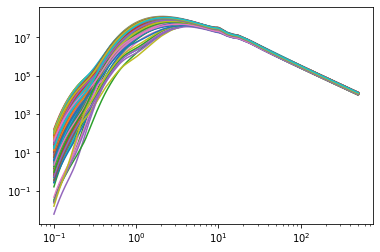

In [1]:
# Remove spikes from SED
# Merge SEDs with different seeds
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
import os

folder = '../r3dresults/st28gm06n052_timedep'
phases = [
    '181',
    '183',
    '185',
    '187',
    '189',
    '191',
    '193',
    '195',
    '197',
    '199',
    '201',
    '203',
    '205',
    '206',
    '207',
    '208',
    '209',
    '210',
    '211',
    '212',
]

angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
for phase in phases:
    for angle in angles:
        a,b = a3d.remove_sedspikes(
                paths = [
                            f'{folder}_1/{phase}/spectrum_{angle}.out',
                            f'{folder}_2/{phase}/spectrum_{angle}.out',
                            f'{folder}_3/{phase}/spectrum_{angle}.out',
                        ],
                save=True
            )
        os.system(f'mv ../spectrum.out {folder}_nospikes/{phase}/spectrum_{angle}.out')

        plt.plot(a,b)
        plt.xscale('log')
        plt.yscale('log')



In [2]:
# Remove spikes from Images
import analyze_r3d_functions as a3d
import os

folder = '../r3dresults/st28gm06n052_timedep'
phases = [
    '181',
    '183',
    '185',
    '187',
    '189',
    '191',
    '193',
    '195',
    '197',
    '199',
    '201',
    '203',
    '205',
    '206',
    '207',
    '208',
    '209',
    '210',
    '211',
    '212',
]
images = [
    'image_i000_phi000_01um.out',
    'image_i000_phi000_10um.out',
    'image_i090_phi000_01um.out',
    'image_i090_phi000_10um.out',
    'image_i090_phi090_01um.out',
    'image_i090_phi090_10um.out',
    'image_i090_phi270_01um.out',
    'image_i090_phi270_10um.out',
    'image_i180_phi000_01um.out',
    'image_i180_phi000_10um.out',
    'image_i270_phi000_01um.out',
    'image_i270_phi000_10um.out'
]
for phase in phases:
    print(f'Doing phase {phase}')
    for image in images:

        image1d = a3d.remove_imagespikes(
            folders = [
                f'{folder}_1/{phase}/',
                f'{folder}_2/{phase}/',
            ],
            imagefilename = image
        )
        os.system(f'mv ../{image} {folder}_nospikes/{phase}/')


Doing phase 181
Doing phase 183
Doing phase 185
Doing phase 187
Doing phase 189
Doing phase 191
Doing phase 193
Doing phase 195
Doing phase 197
Doing phase 199
Doing phase 201
Doing phase 203
Doing phase 205
Doing phase 206
Doing phase 207
Doing phase 208
Doing phase 209
Doing phase 210
Doing phase 211
Doing phase 212


## Plot Images

/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:1757: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.figure(dpi=150), plt.axes()


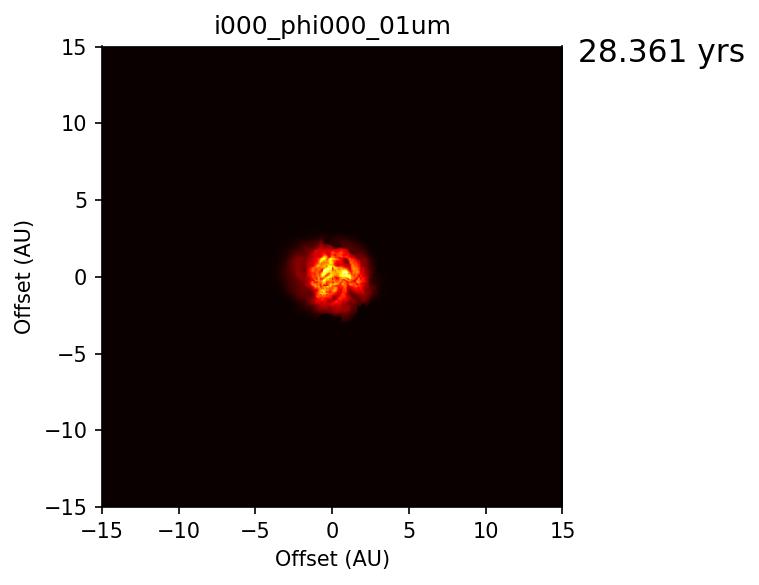

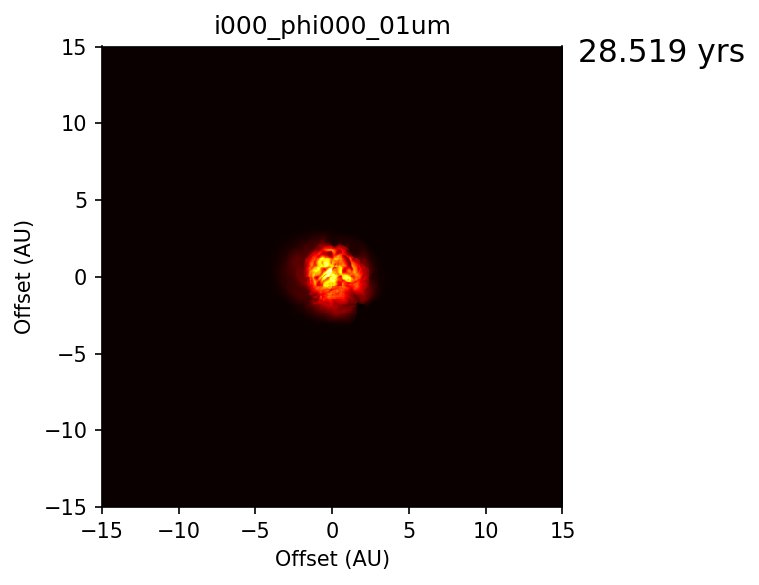

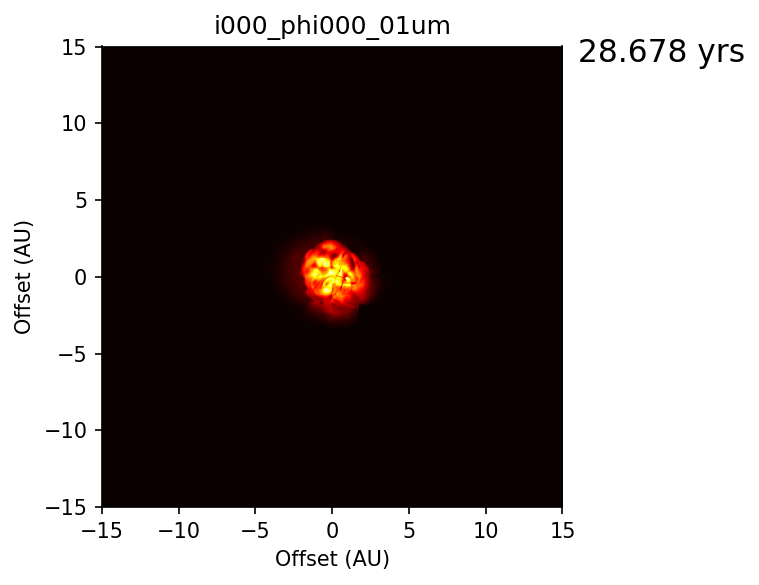

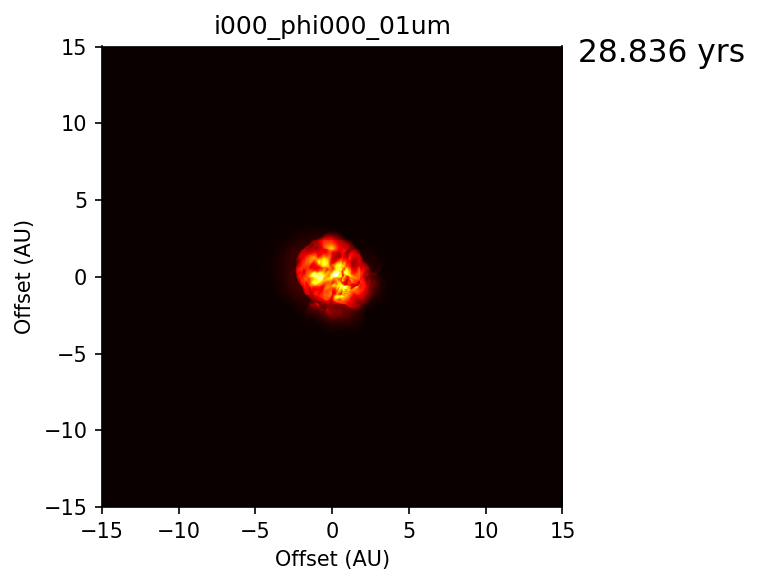

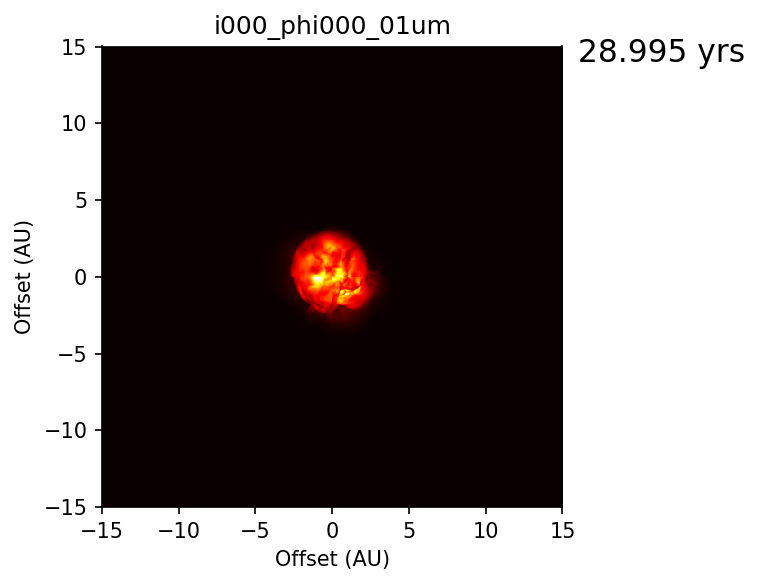

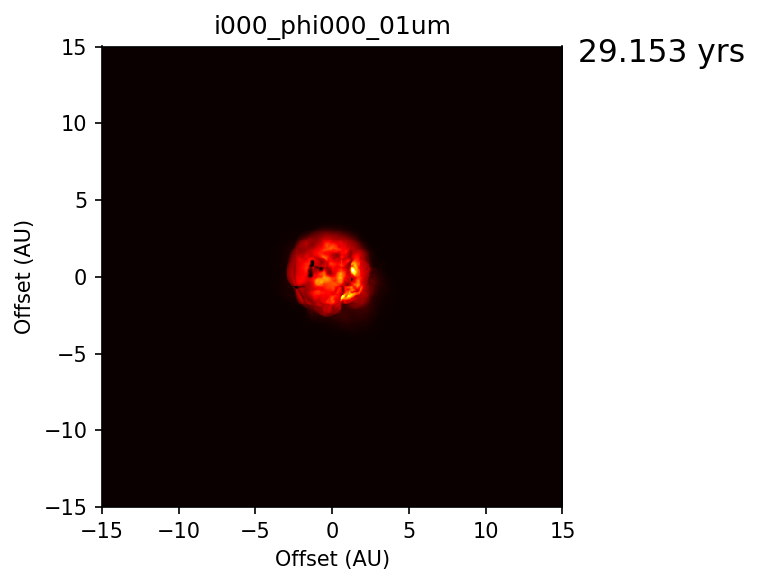

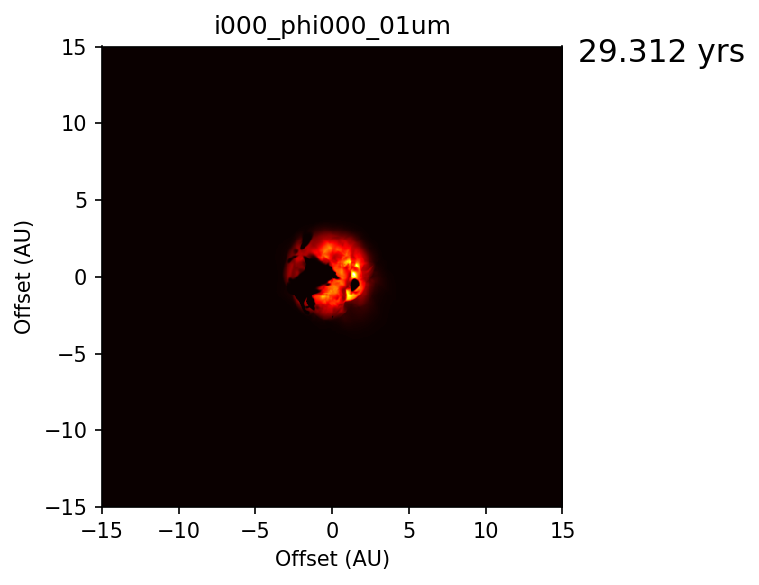

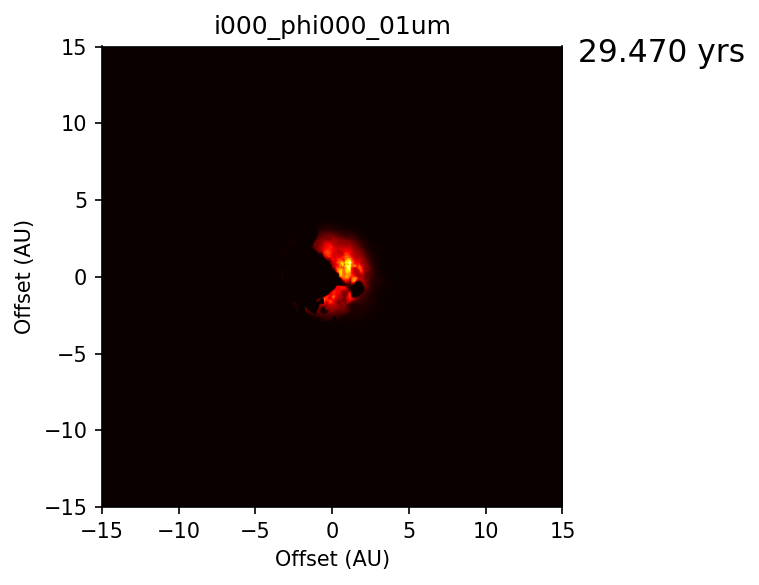

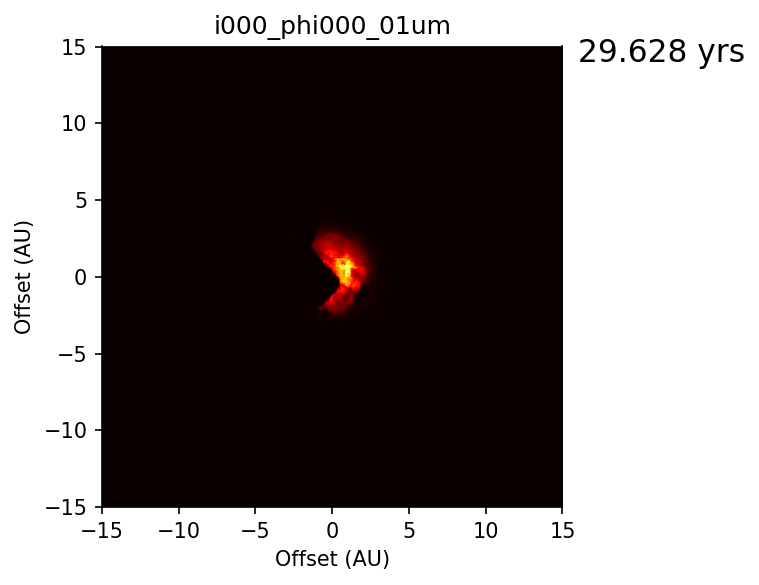

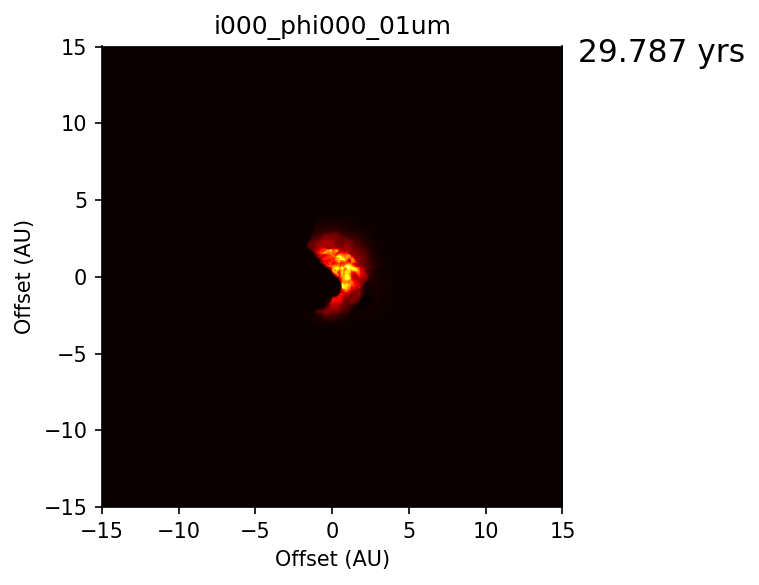

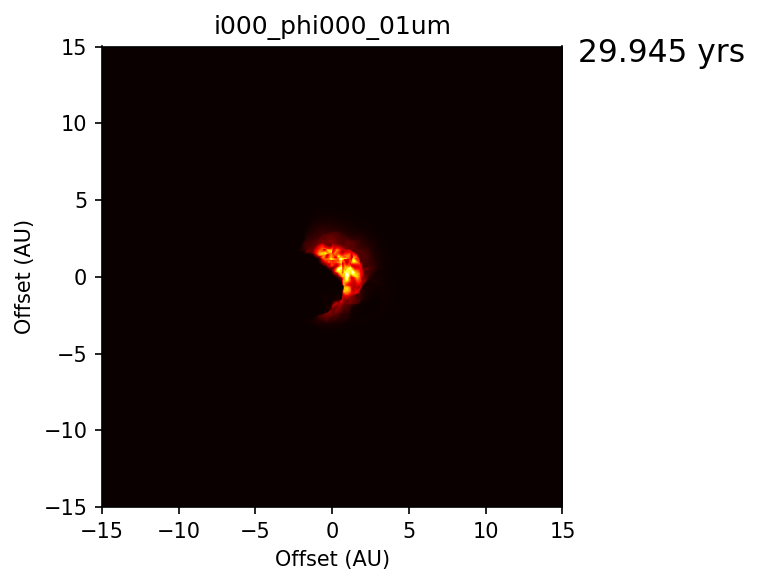

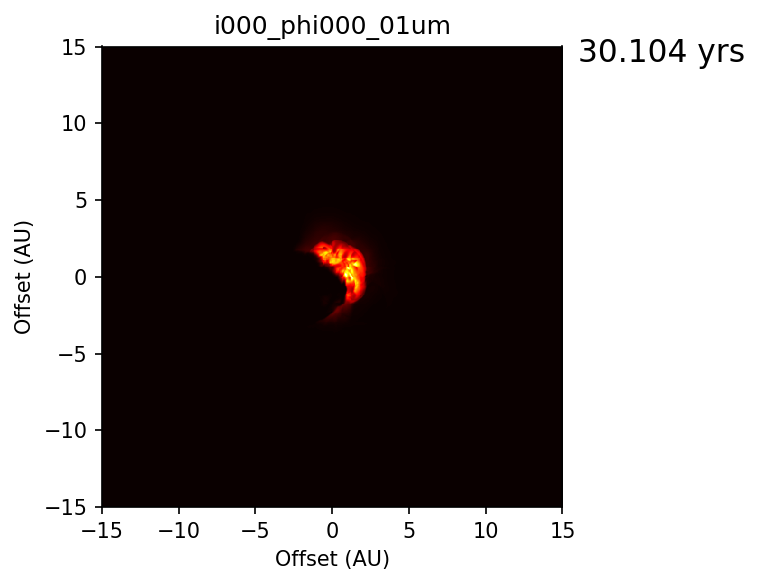

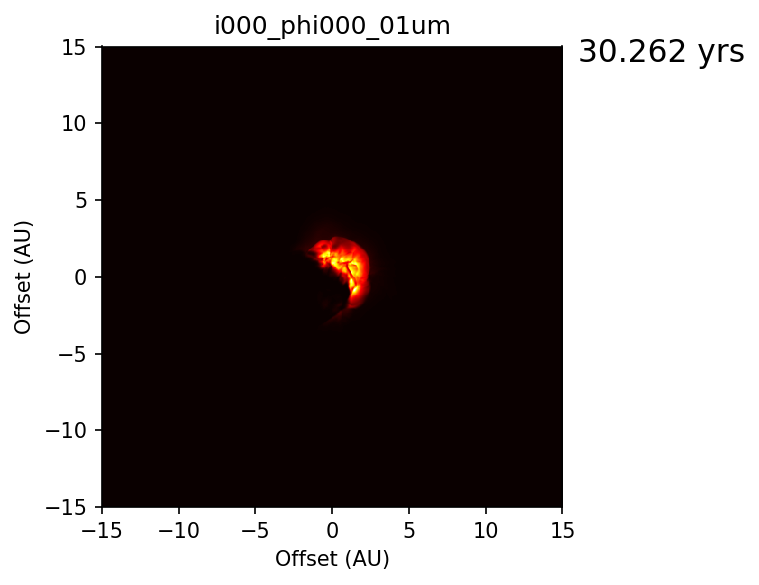

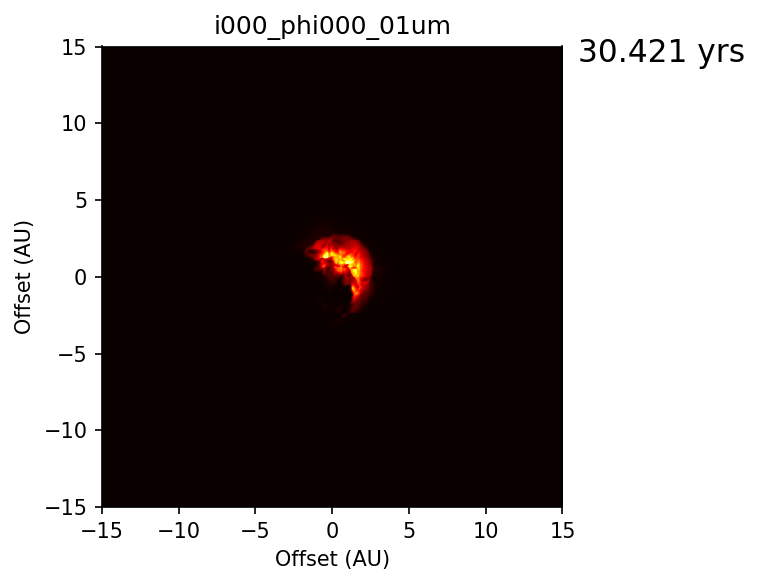

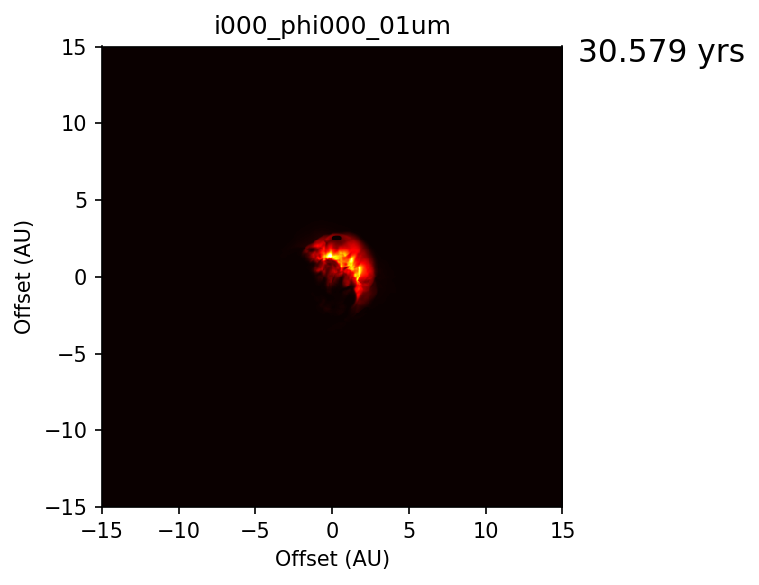

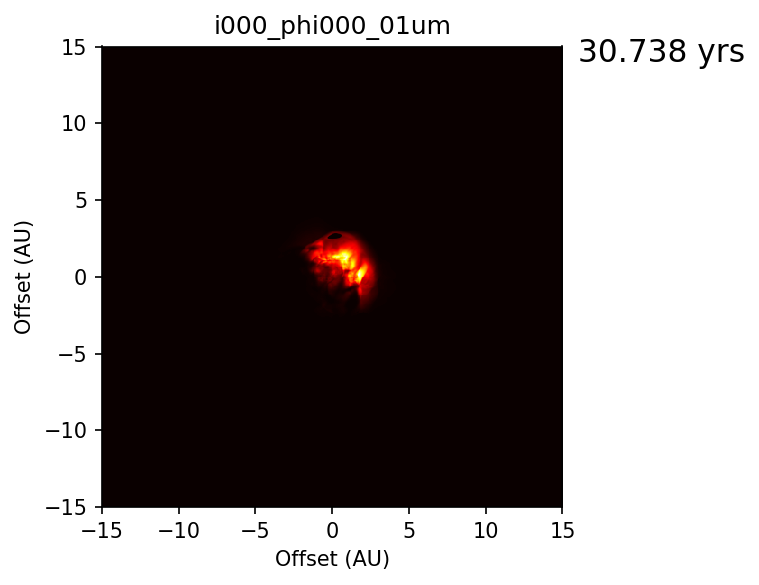

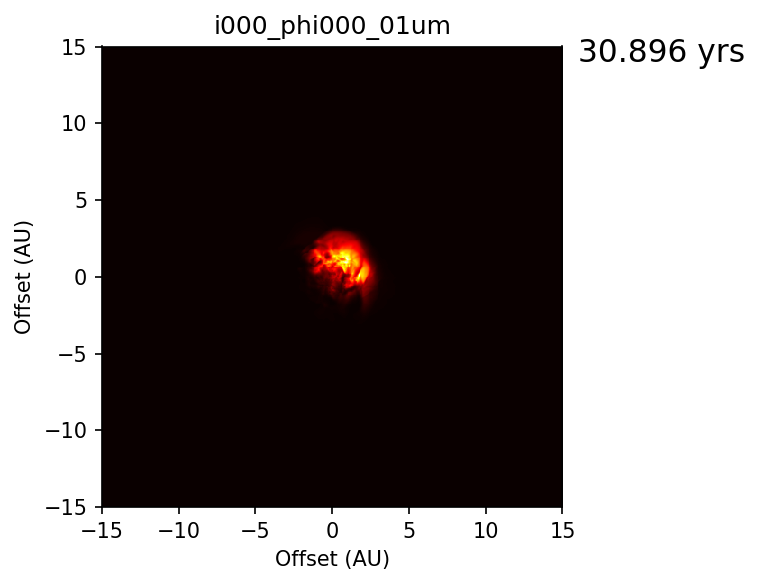

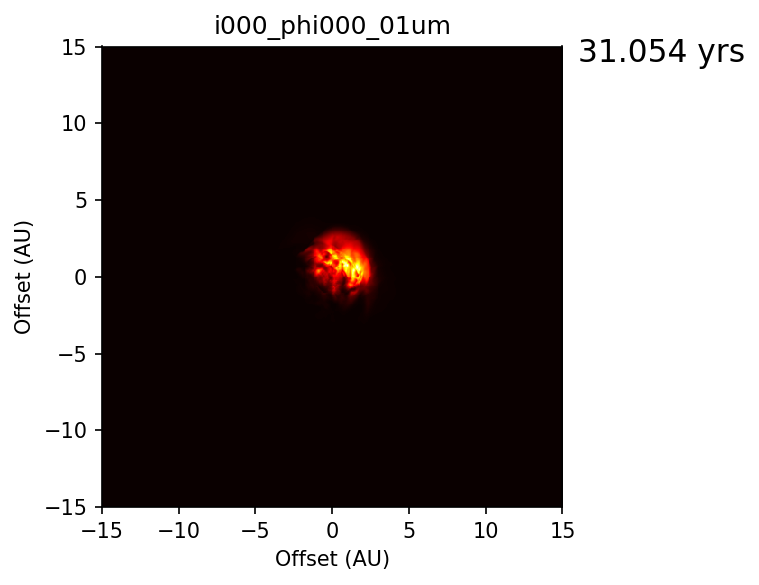

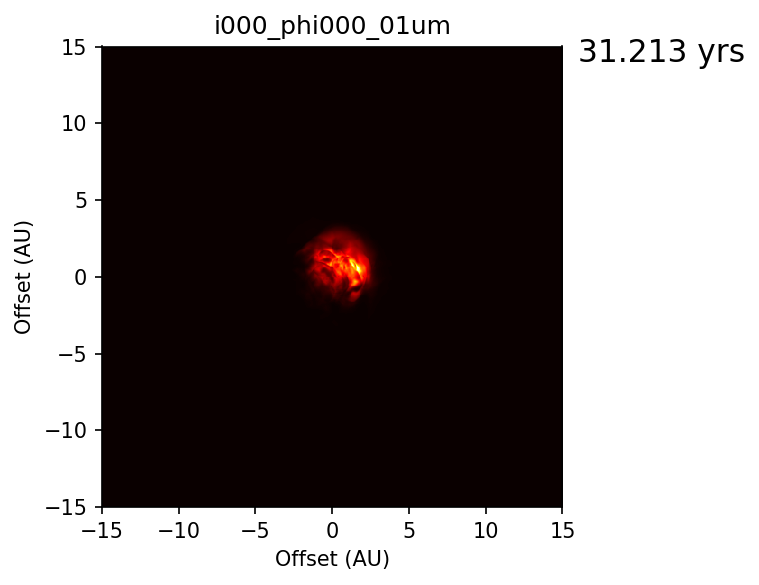

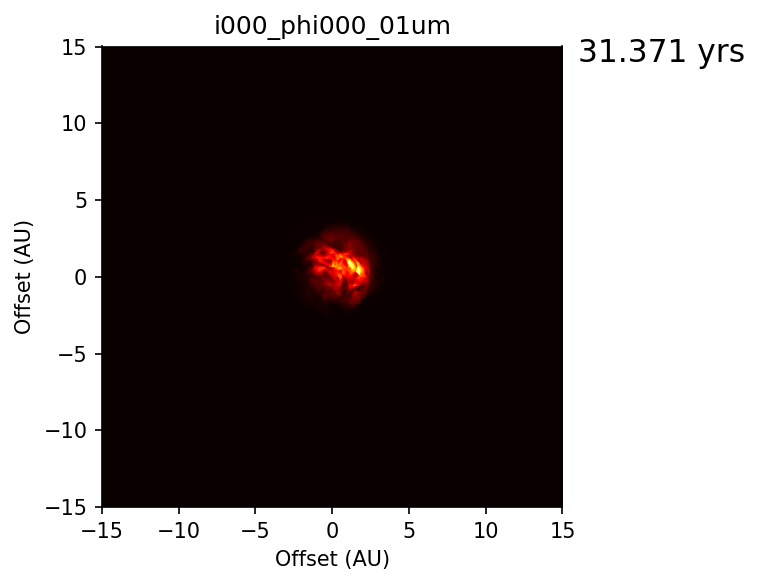

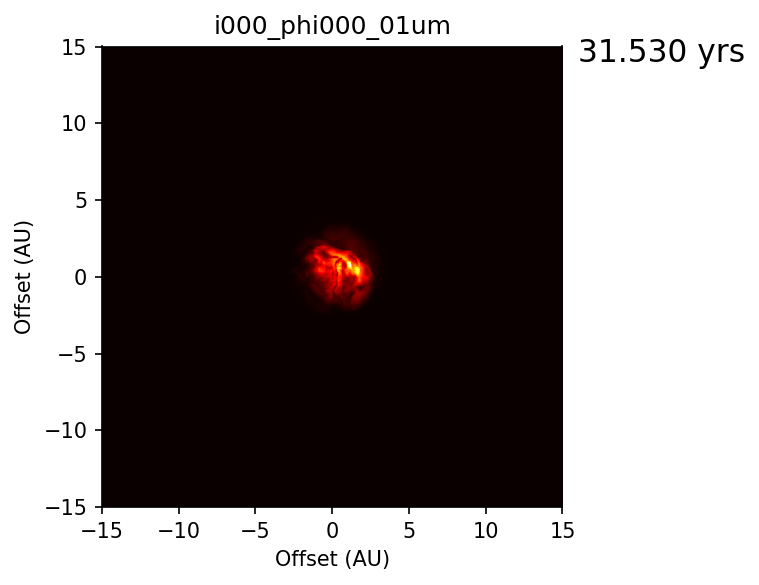

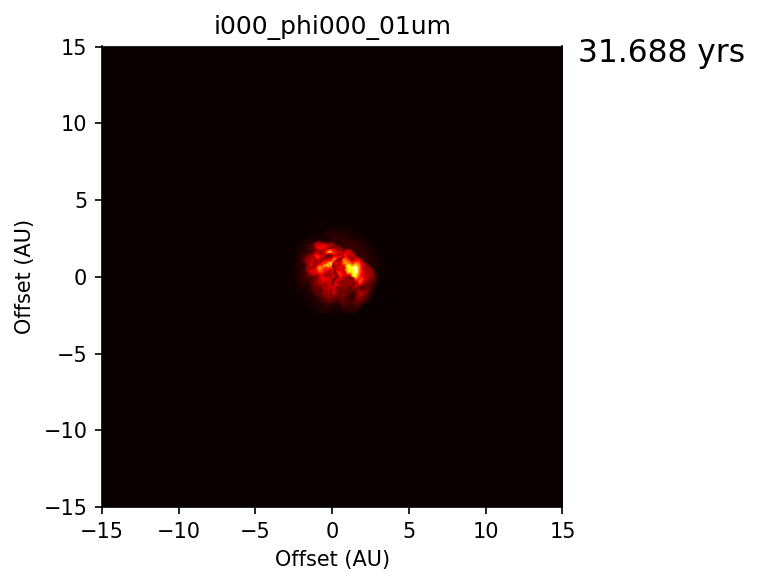

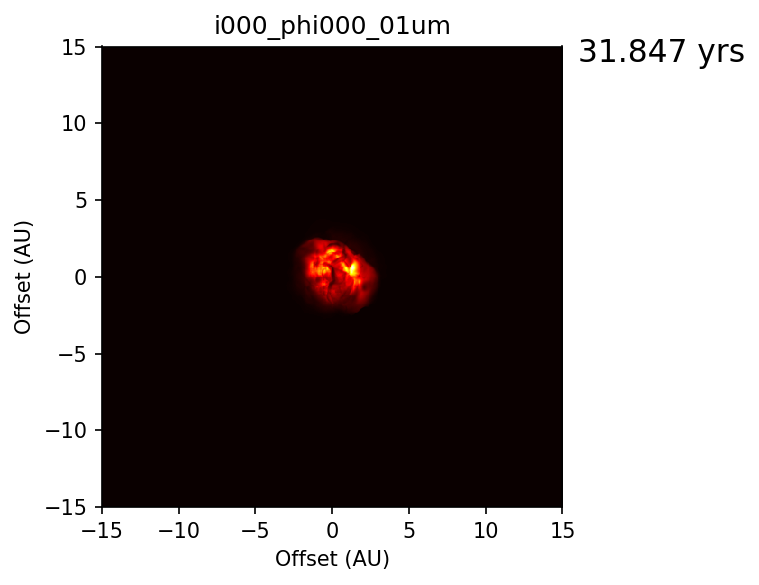

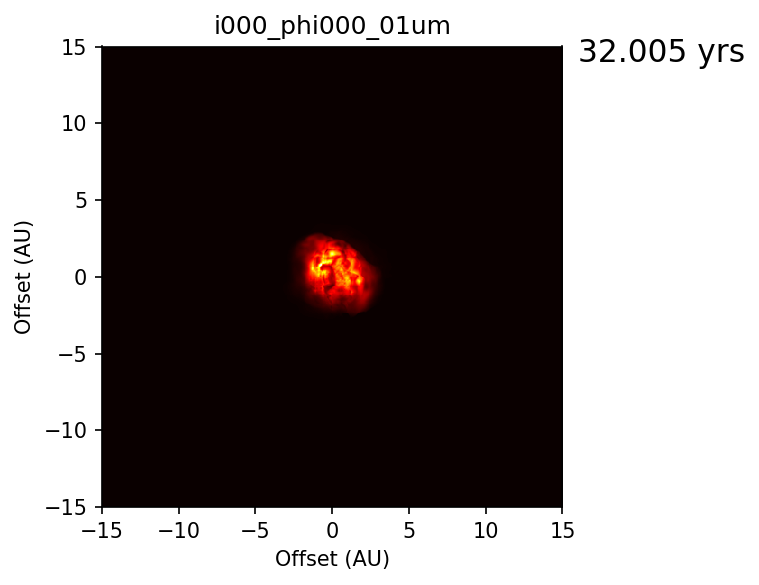

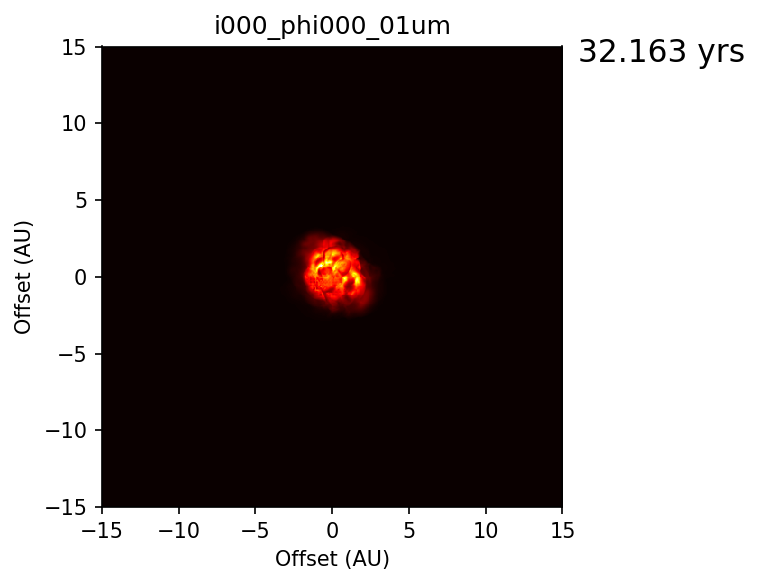

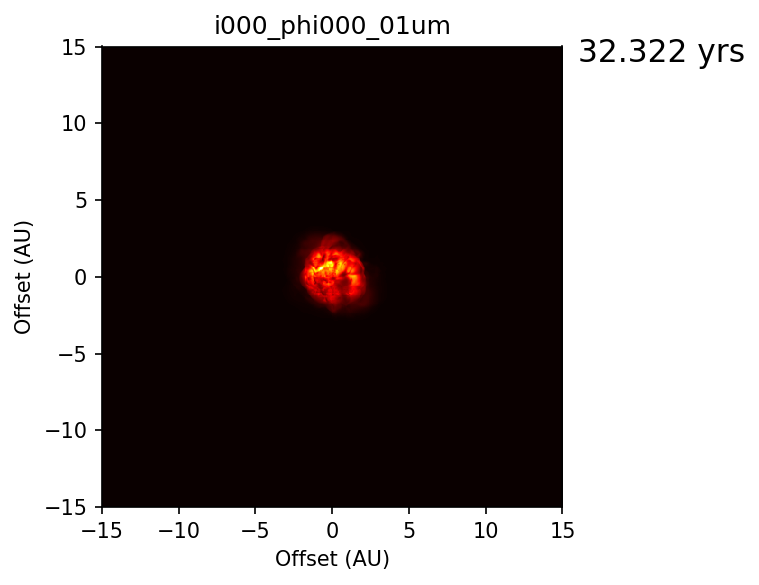

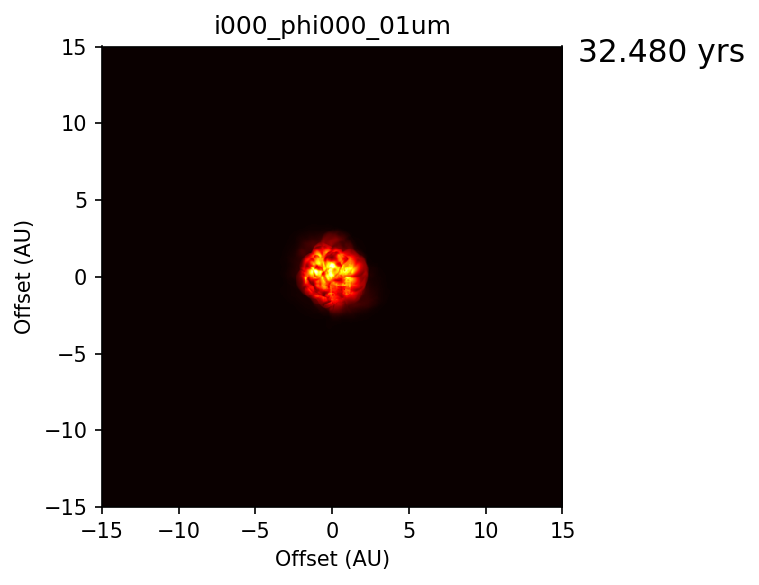

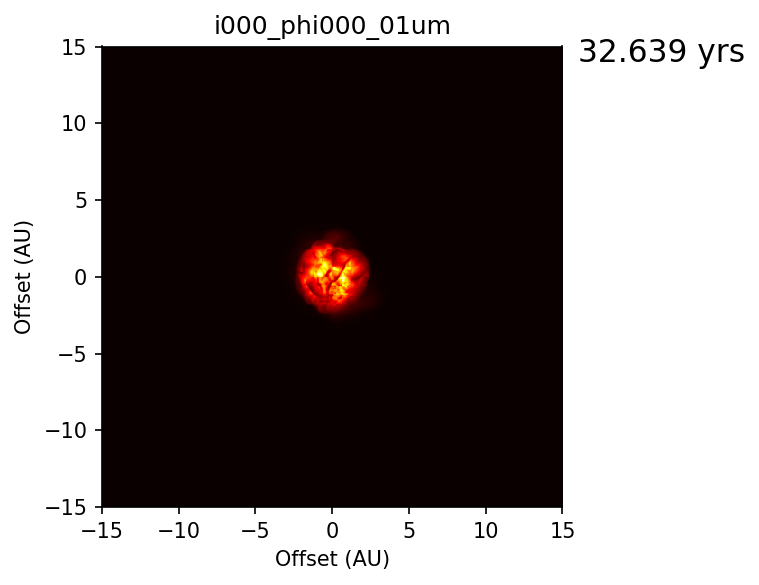

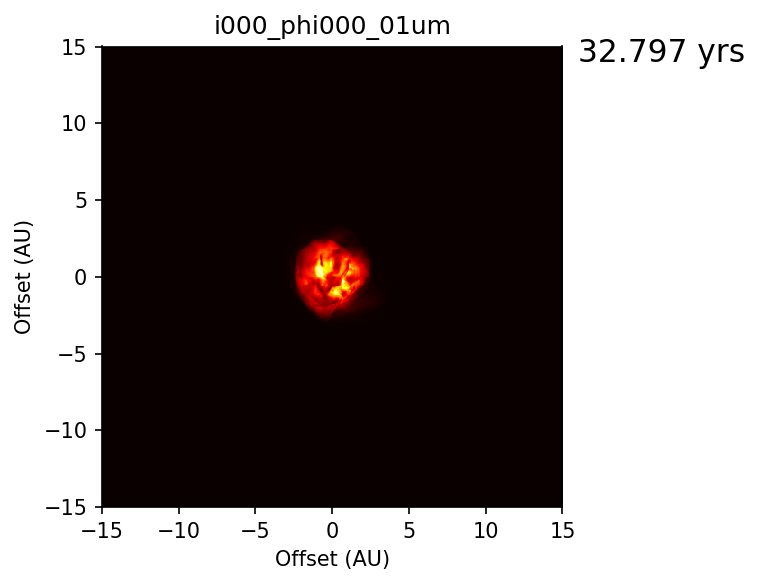

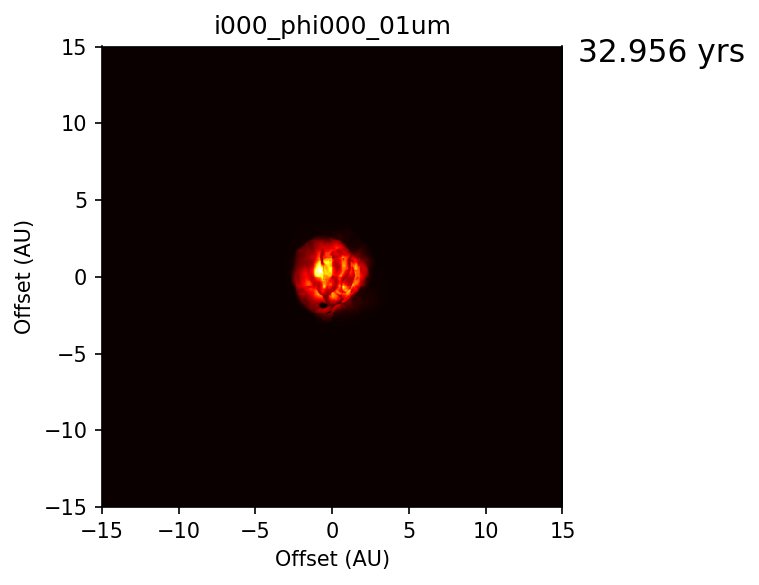

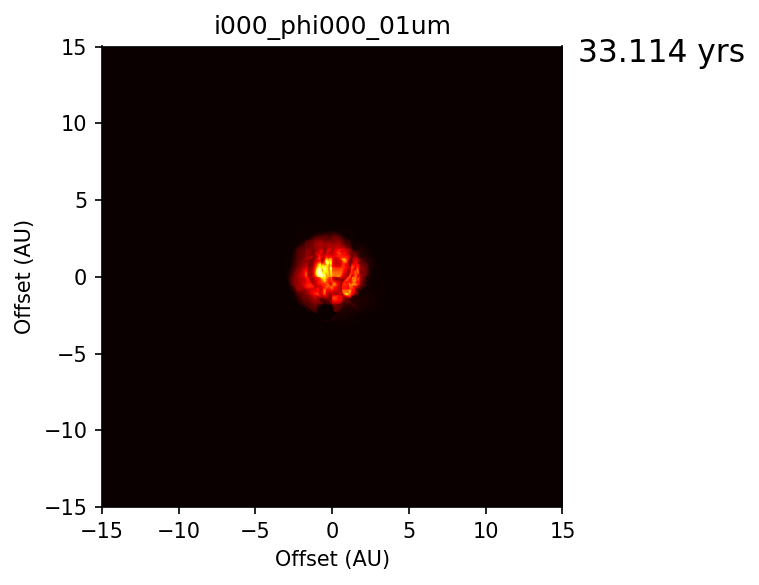

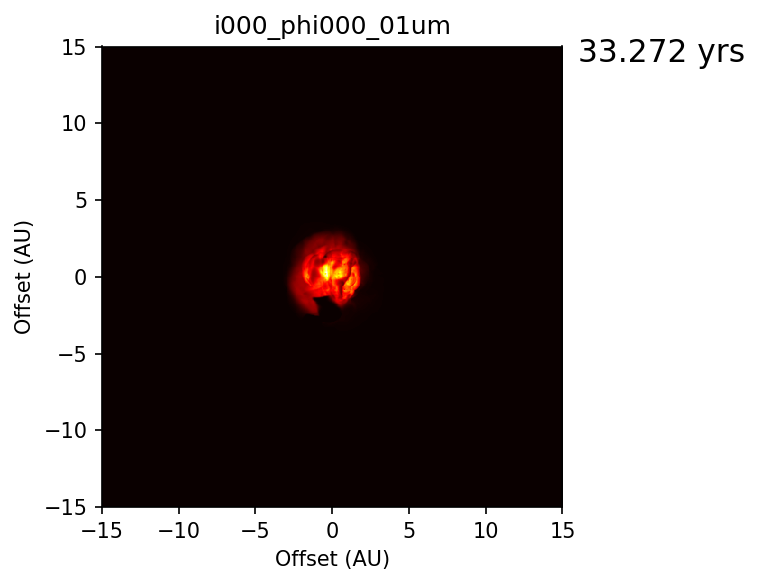

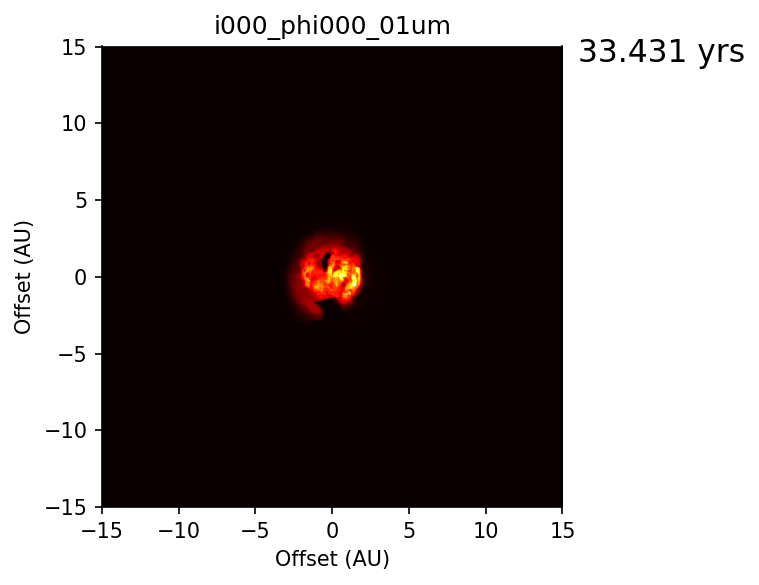

In [1]:
# plot time-series images in one direction, one wavelength
# saves pngs in folder r3dplots, timestamped to today

import os
import numpy as np
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
from datetime import date

path = '../r3dresults/st28gm06n052_timedep_nospikes/'
wavelength = '01'
imagefilename = f'image_i000_phi000_{wavelength}um.out'

# Create outputfolder
outputfolder = f'../r3dplots/{str(date.today())}_image-1direct-{wavelength}um/'
if os.path.exists(outputfolder) == False:
    os.system(f'mkdir {outputfolder}')

# Extract list of folders from the path folder, and make them to numbers, and sort them!
snapshot_folders = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
snapshot_folders.sort()

# Load snapshot times ([:,1] is years, [:,0] is snapshot number)
snapshot_times = np.loadtxt(path+'snapshot_yr.dat')


# Load one image at a time and save as png's for animationcreations
for nsnap,snapshot in enumerate(snapshot_folders):

    # Create plot objects with image
    fig, ax, fluxtotal = a3d.plot_images(
        path = f'{path}/{snapshot}/',
        images = [imagefilename]
    )
    ax.text(
        x=16,y=14,
        s=f'{snapshot_times[nsnap,1]:.3f} yrs',
        backgroundcolor='white',
        fontsize=15
    )

    # Save as PNG's
    fig.tight_layout()
    fig.savefig(f'{outputfolder}{snapshot}_{imagefilename[:-4]}.png', facecolor='white')







/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:1868: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(


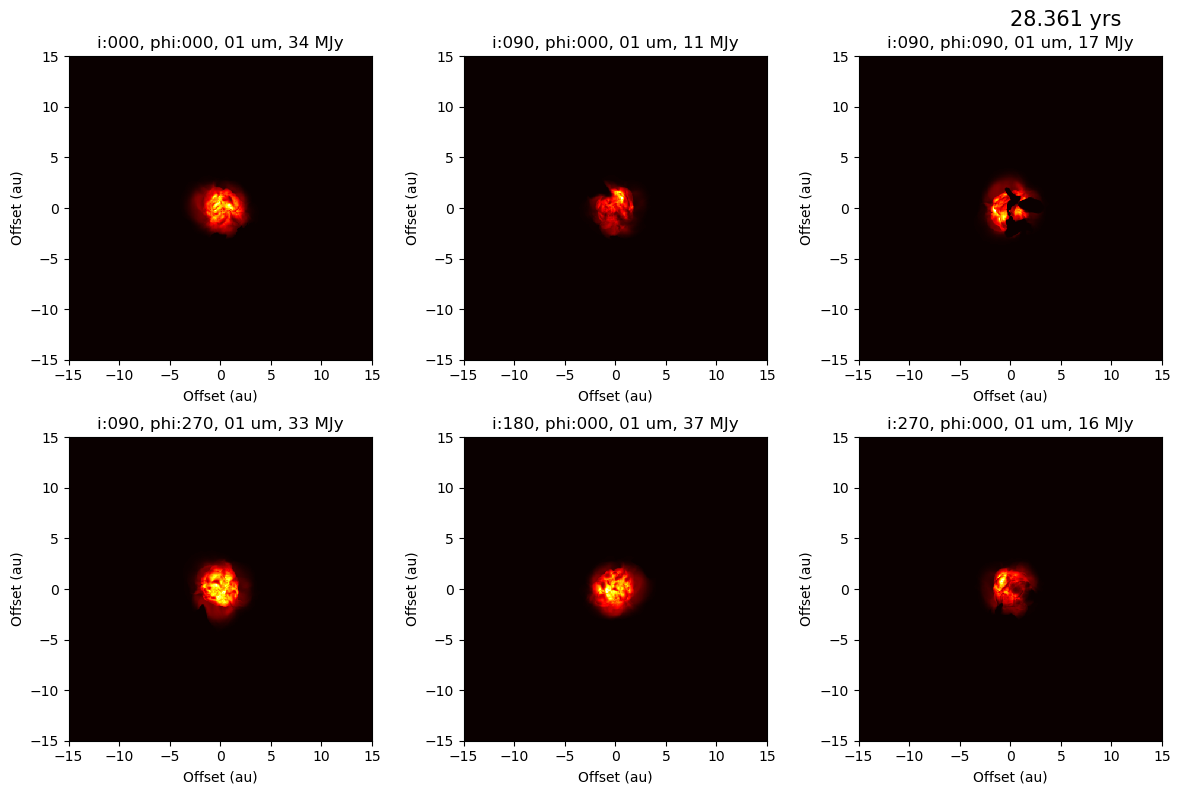

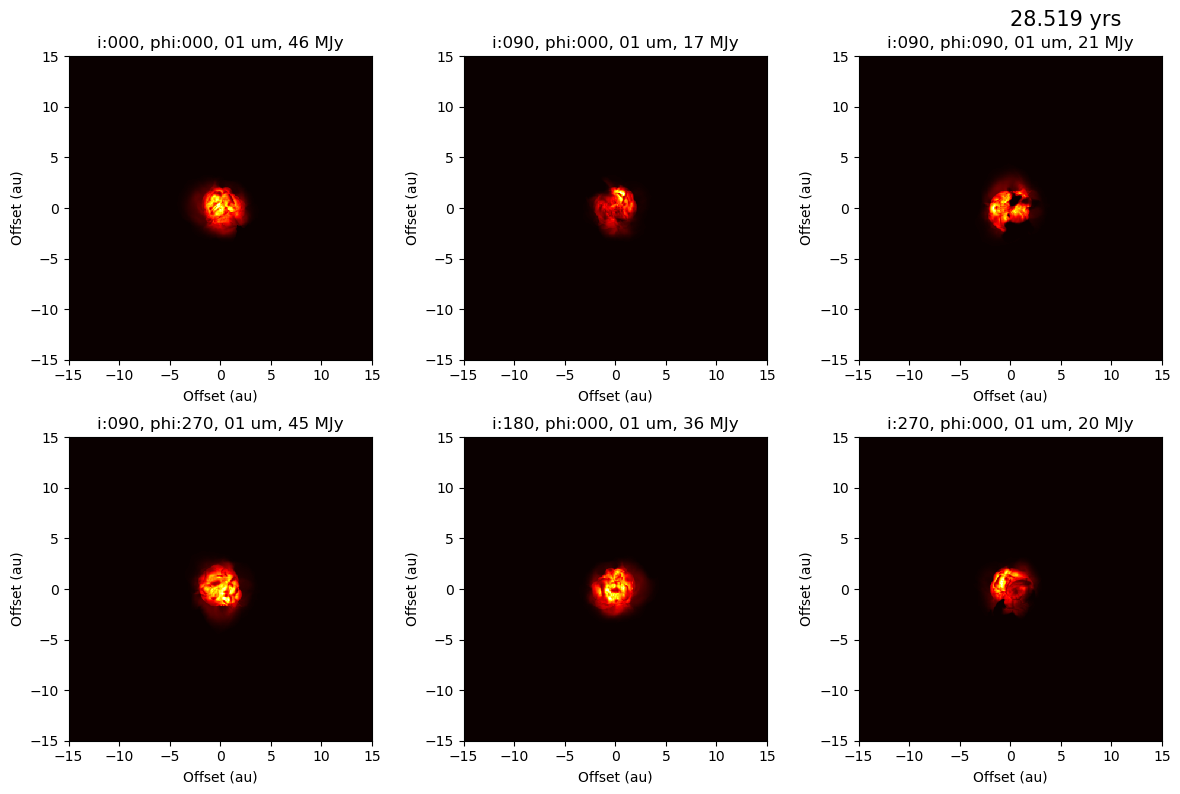

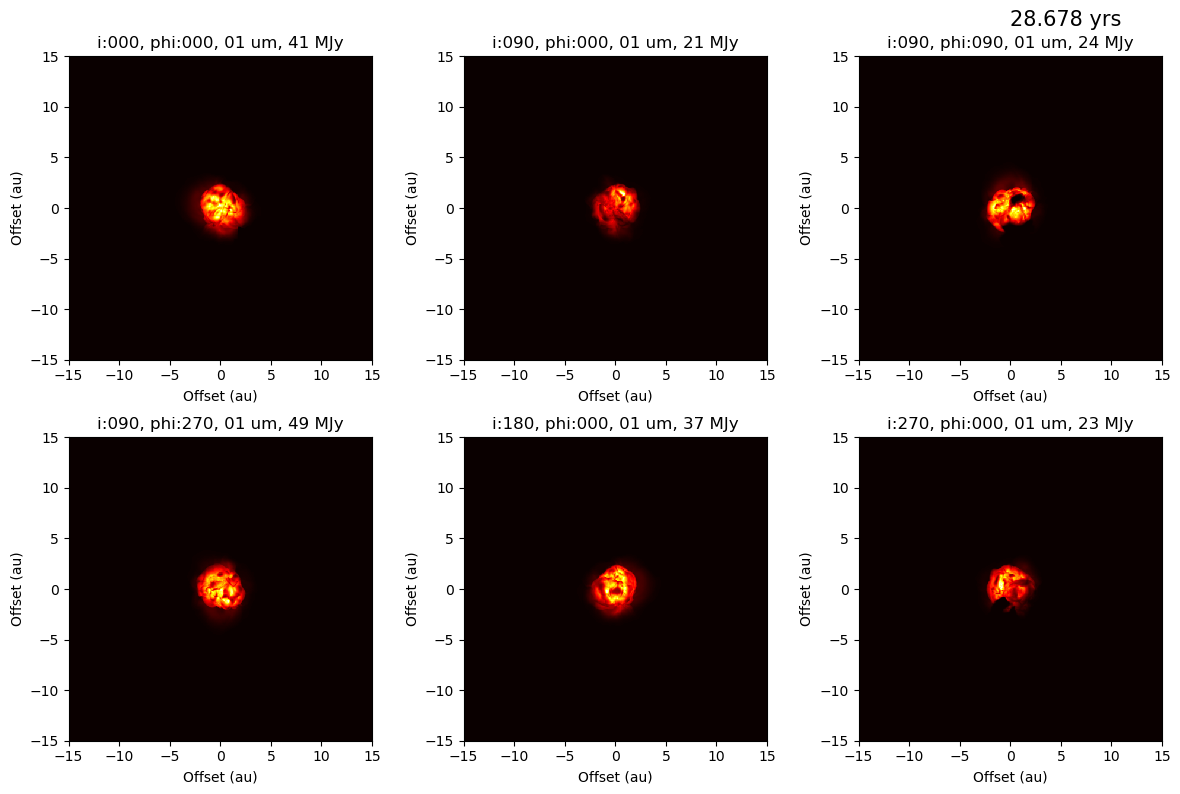

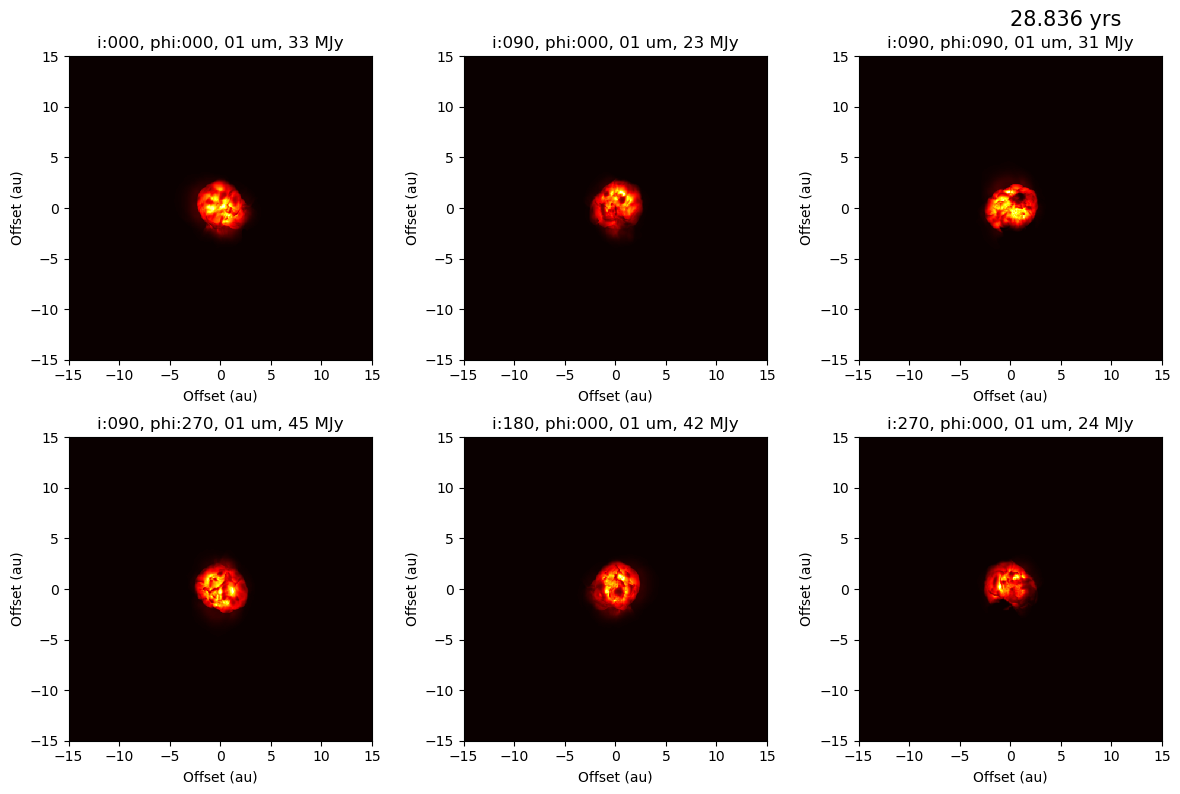

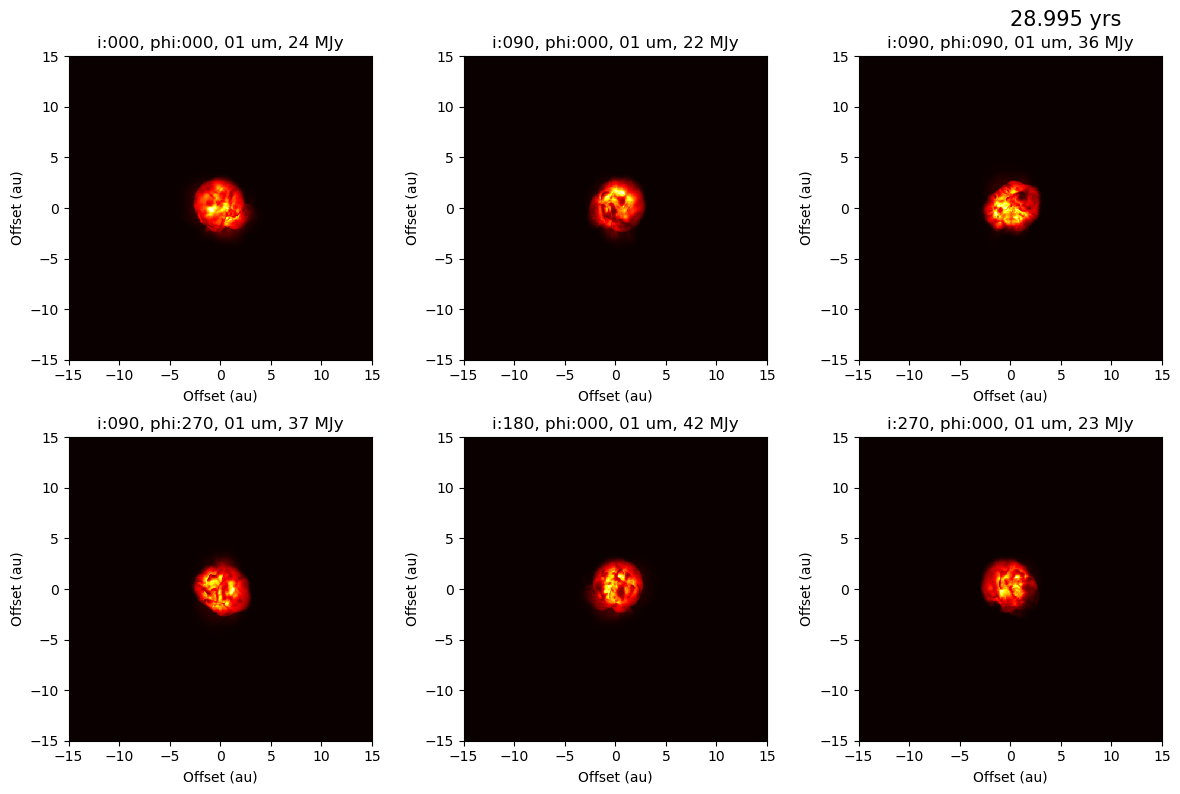

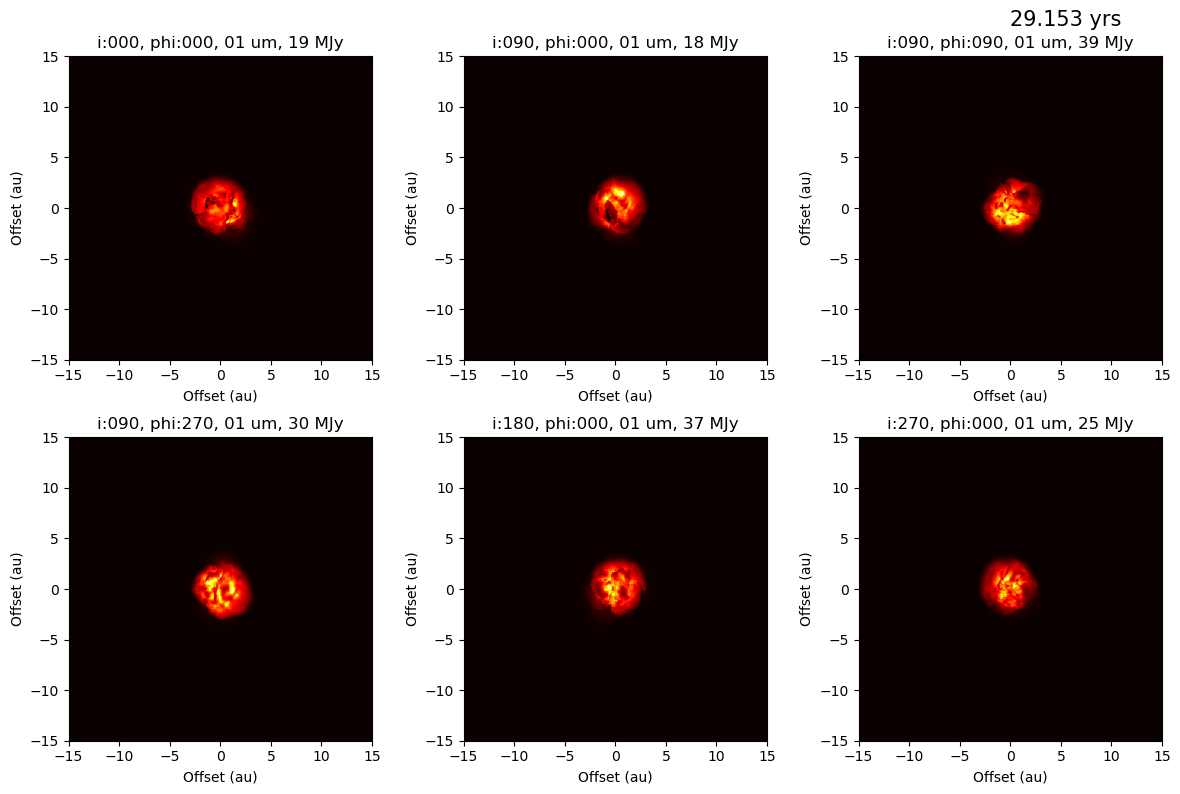

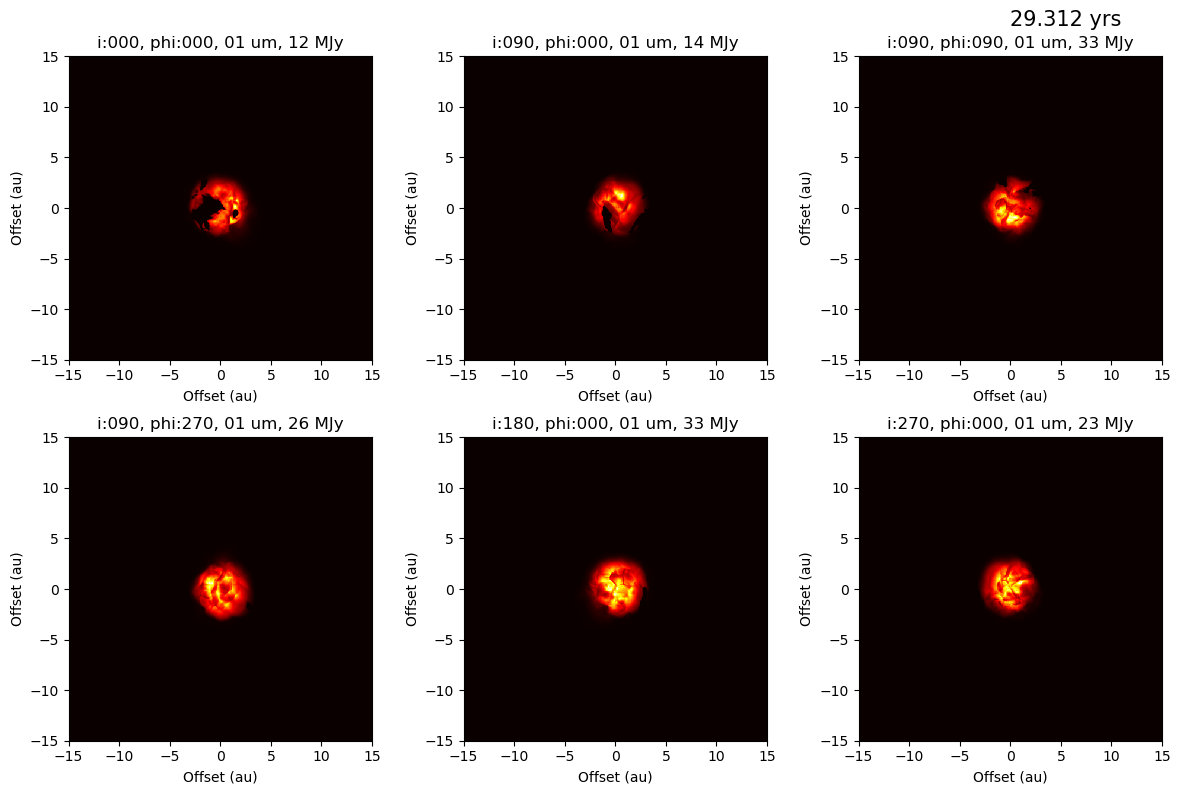

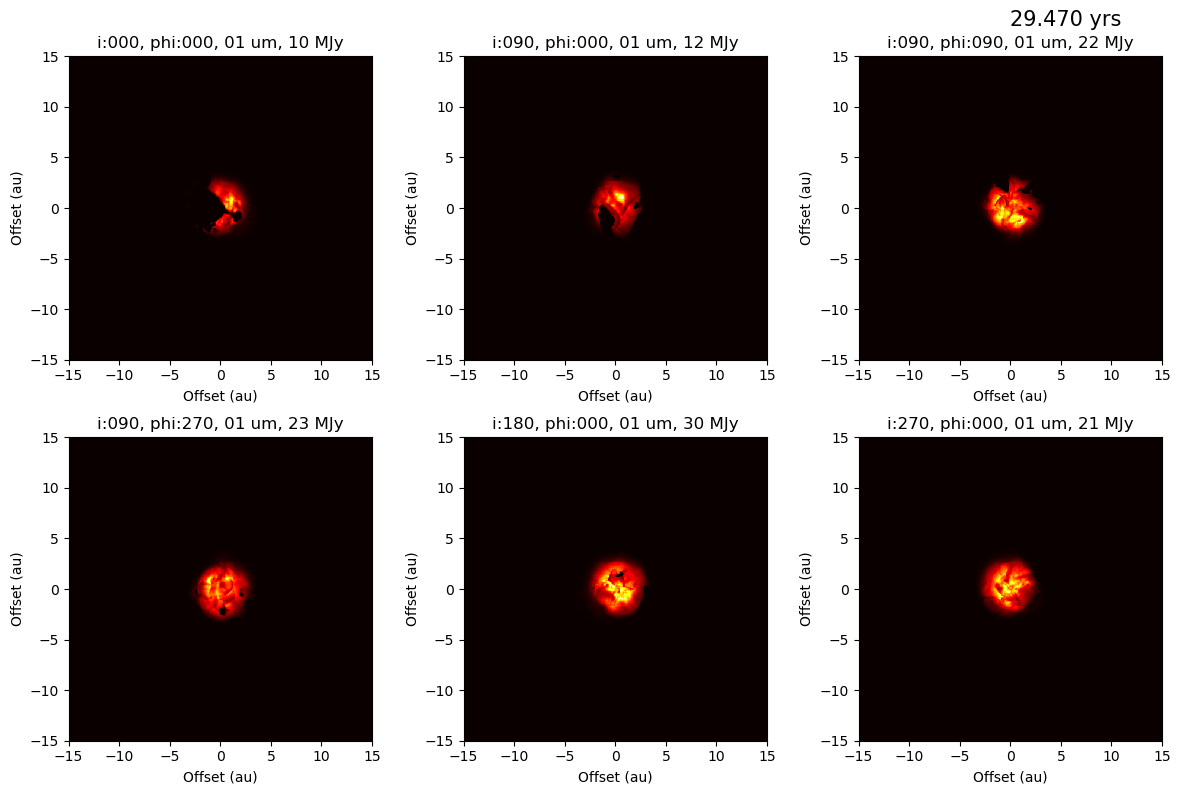

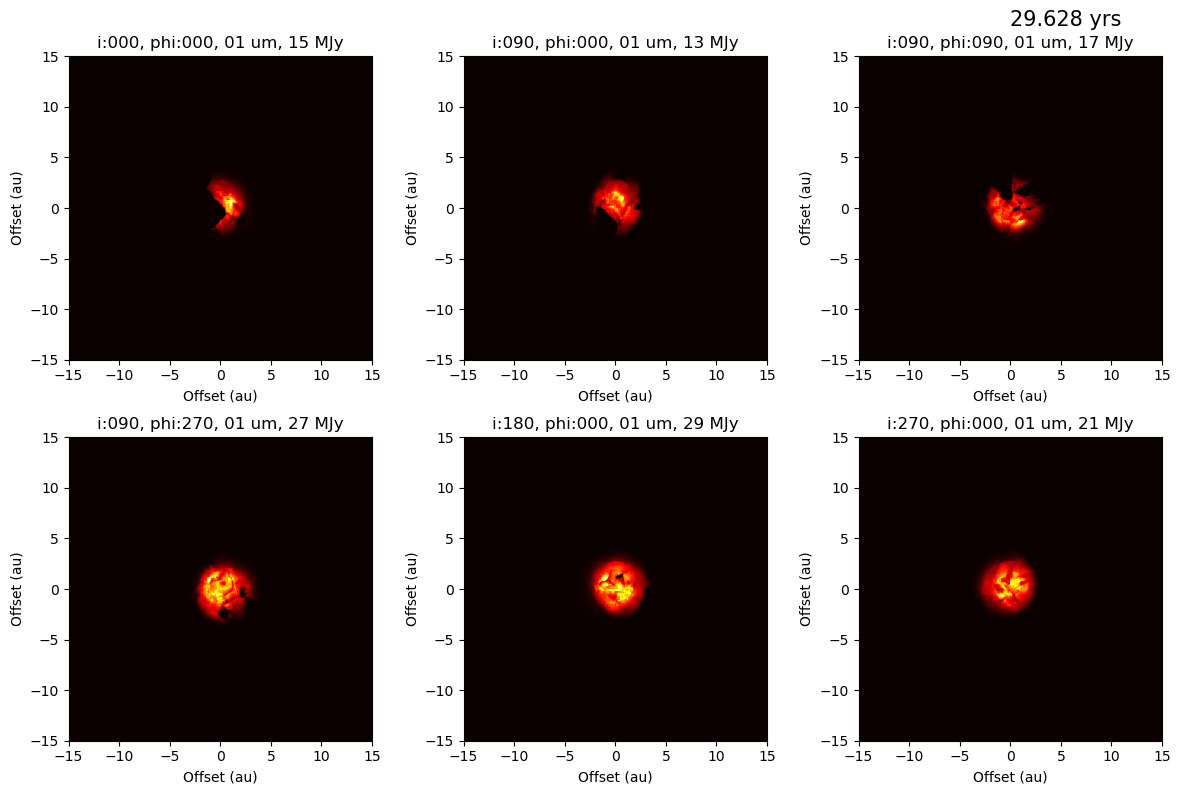

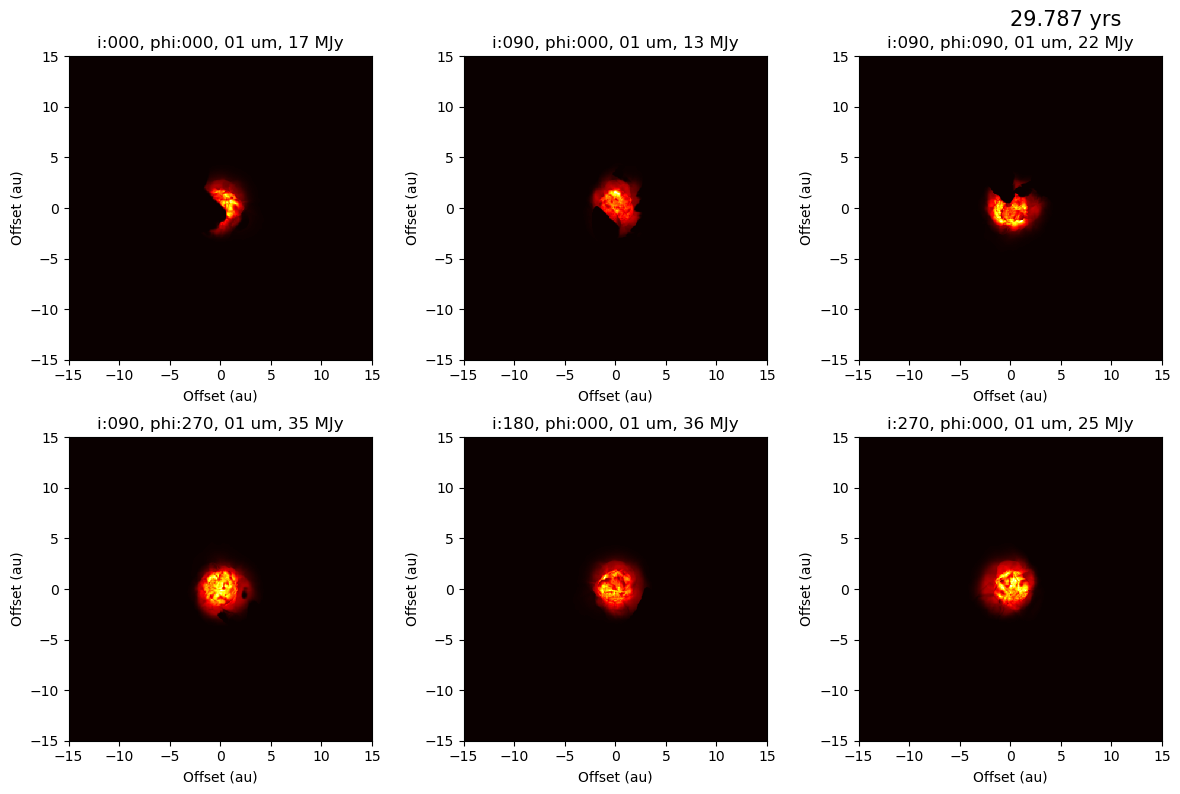

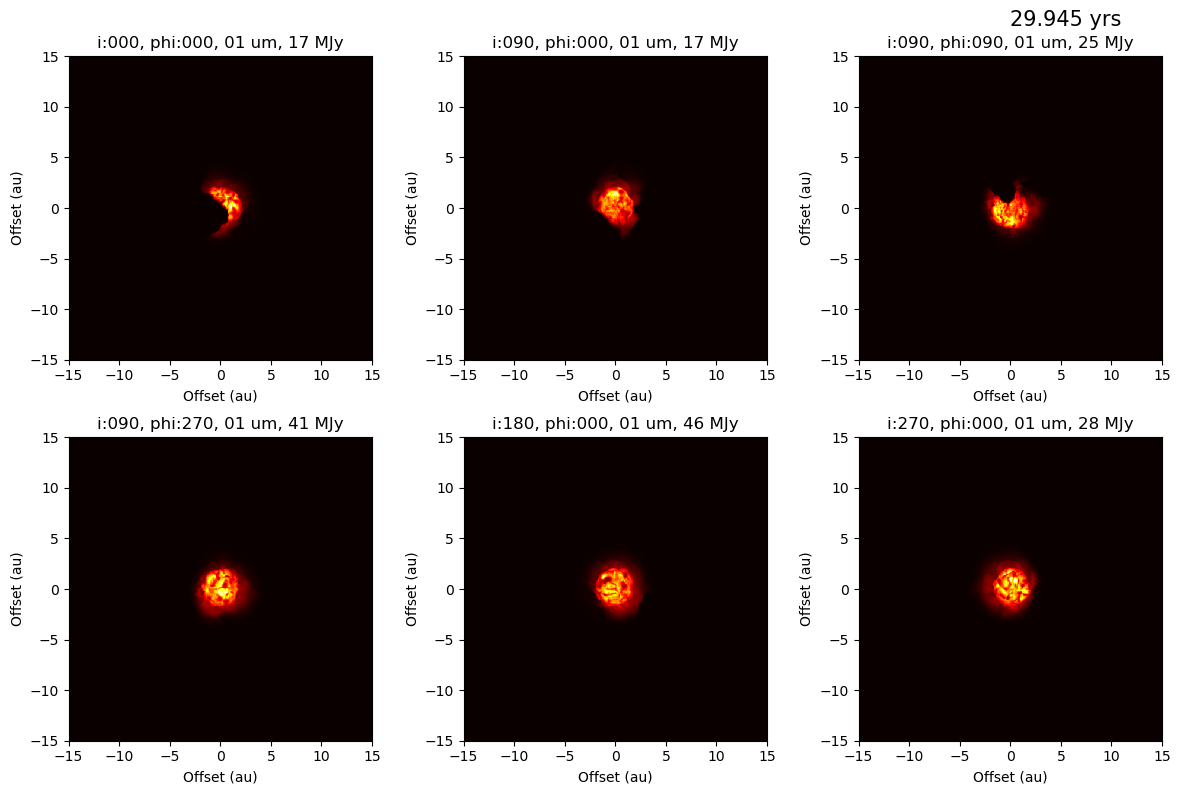

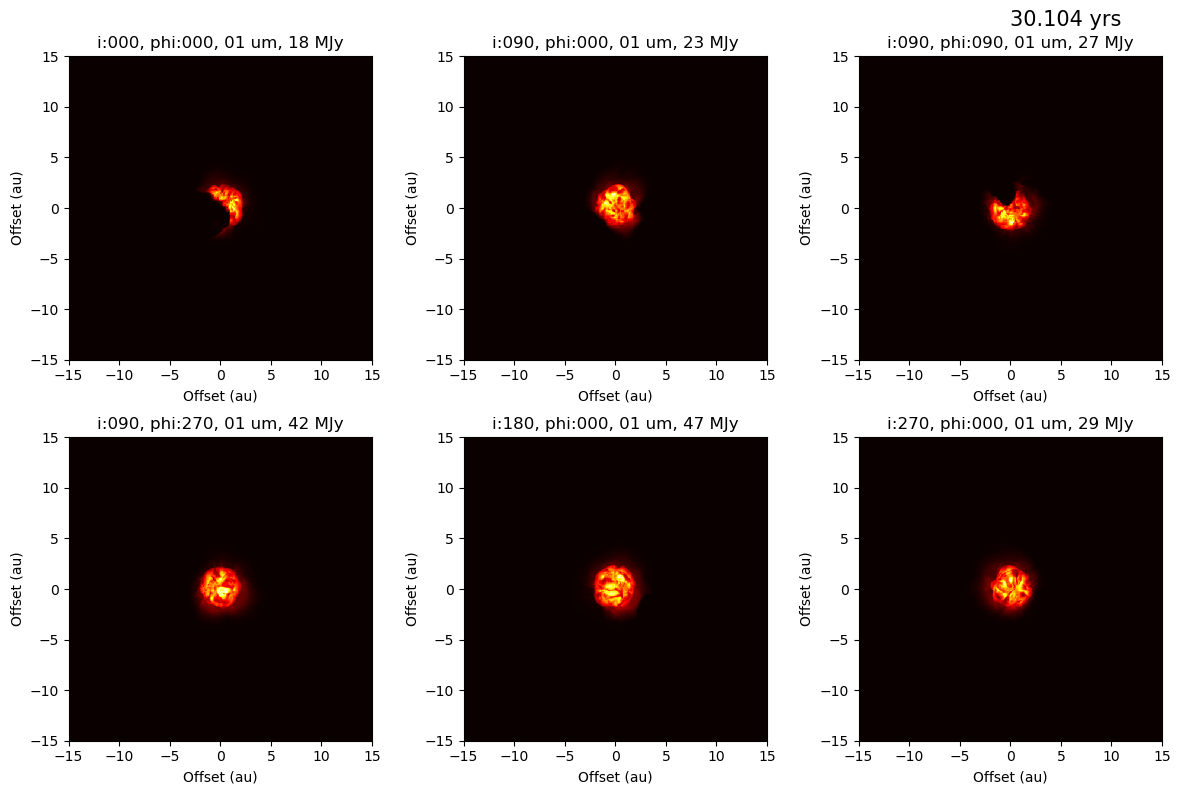

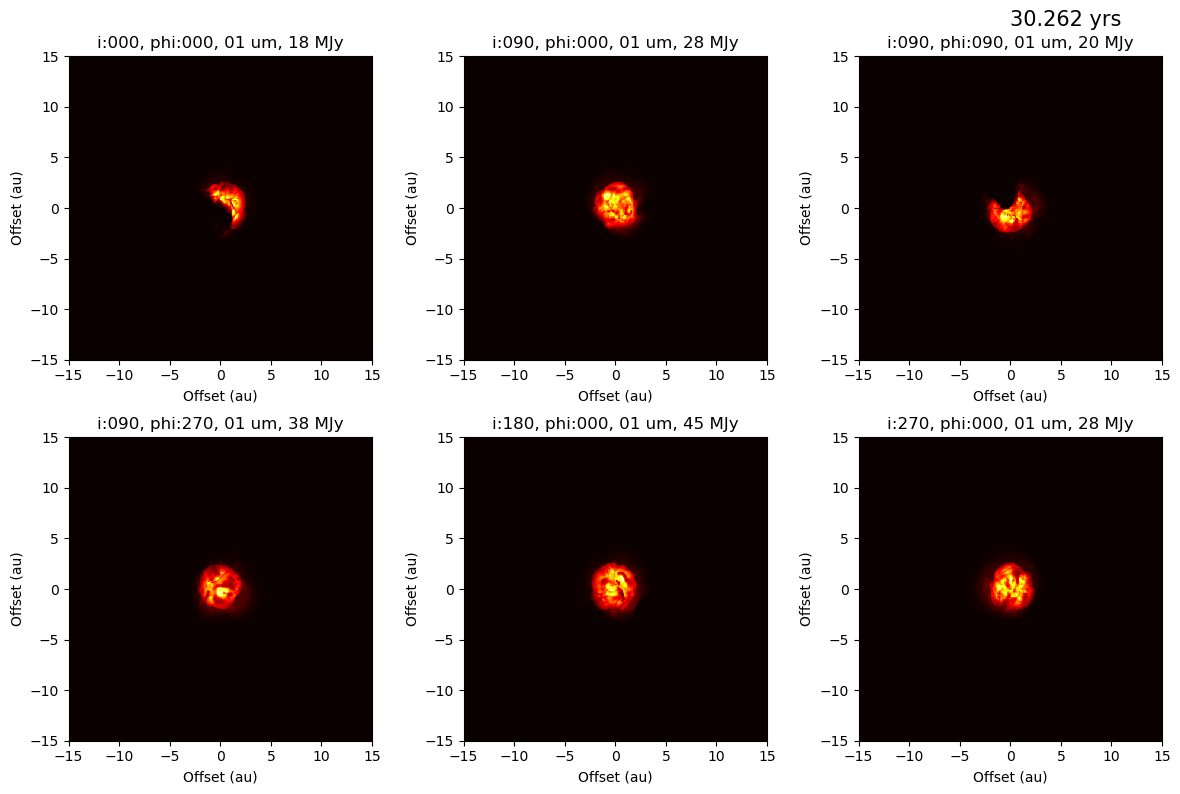

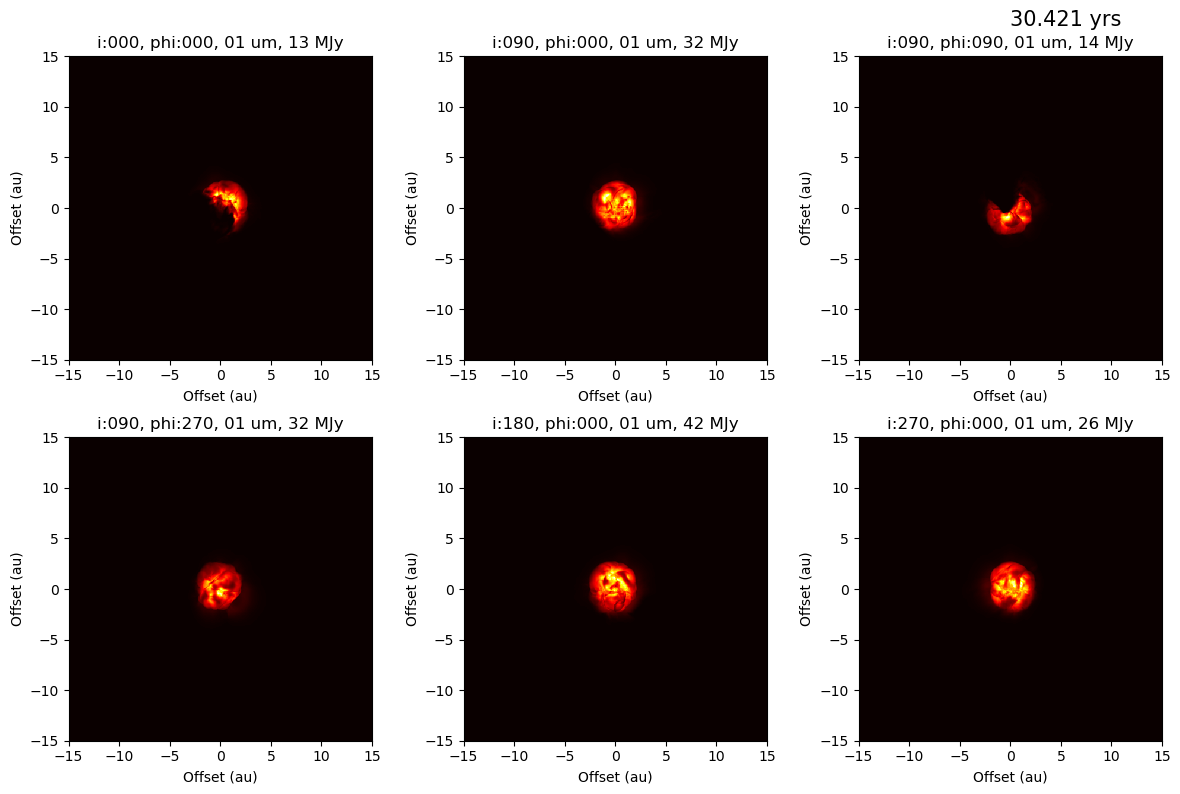

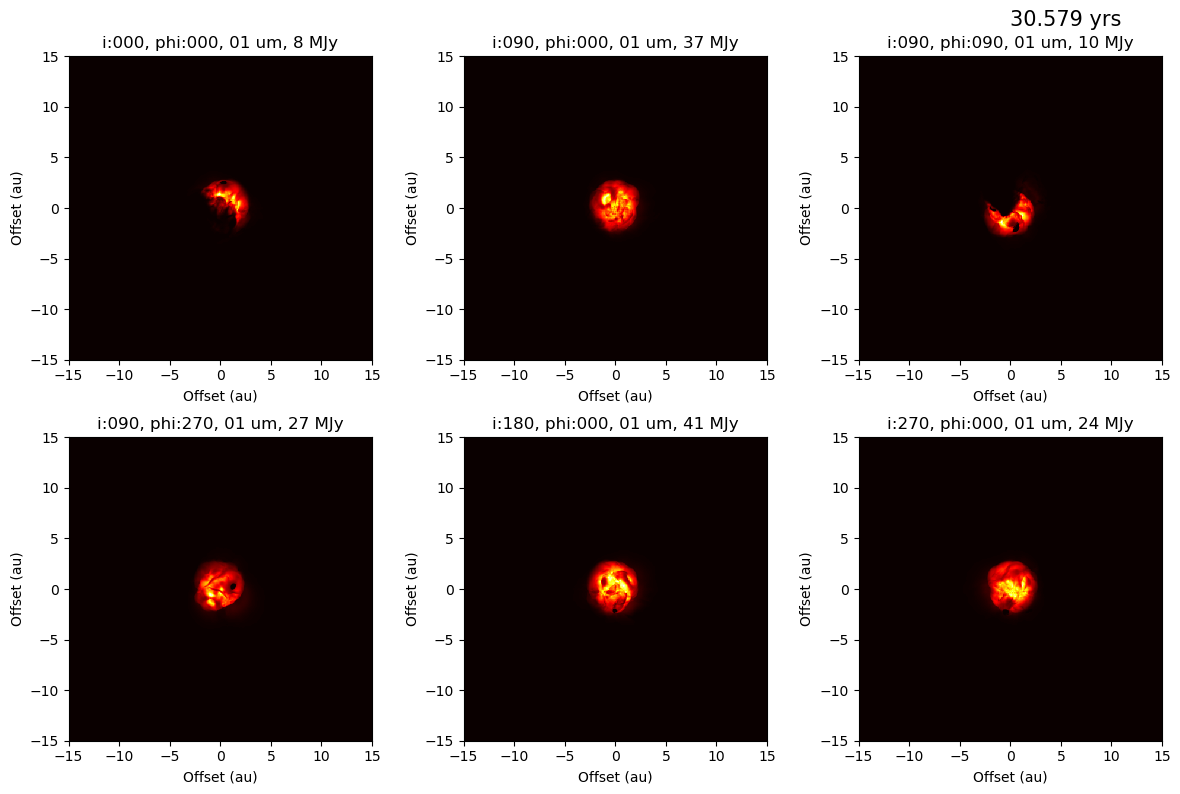

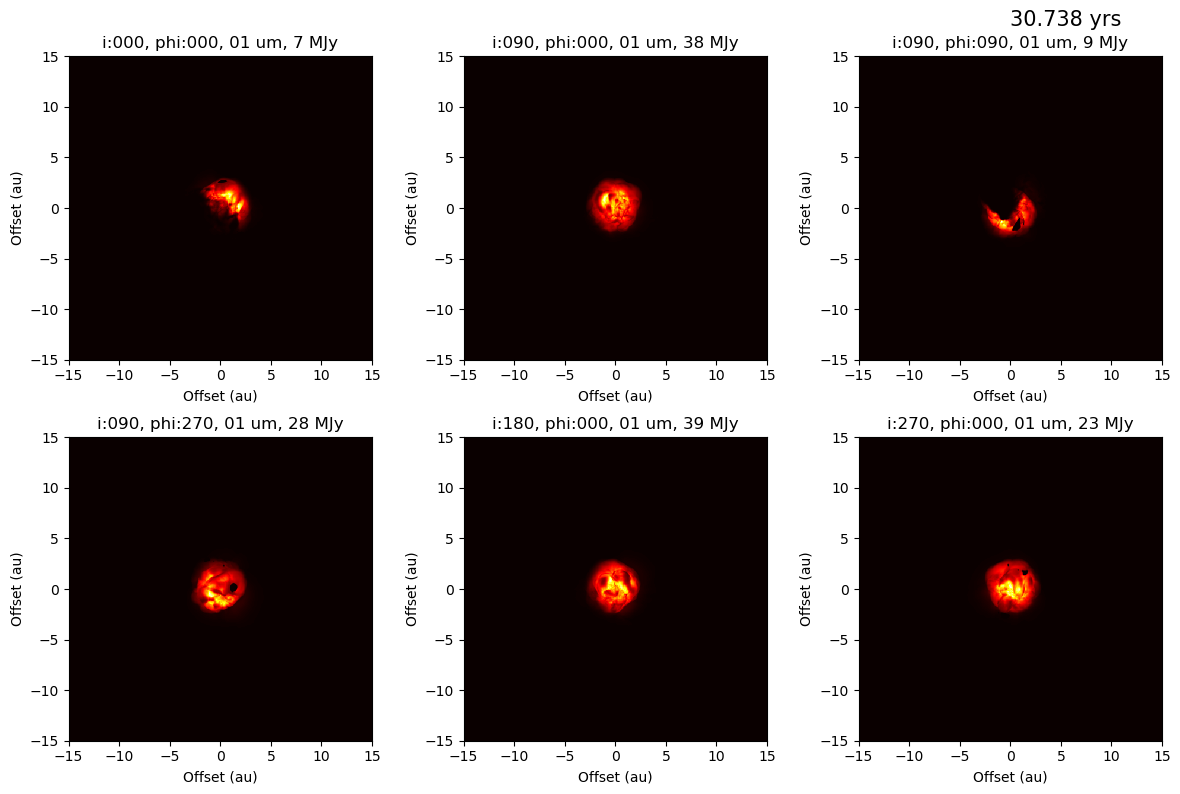

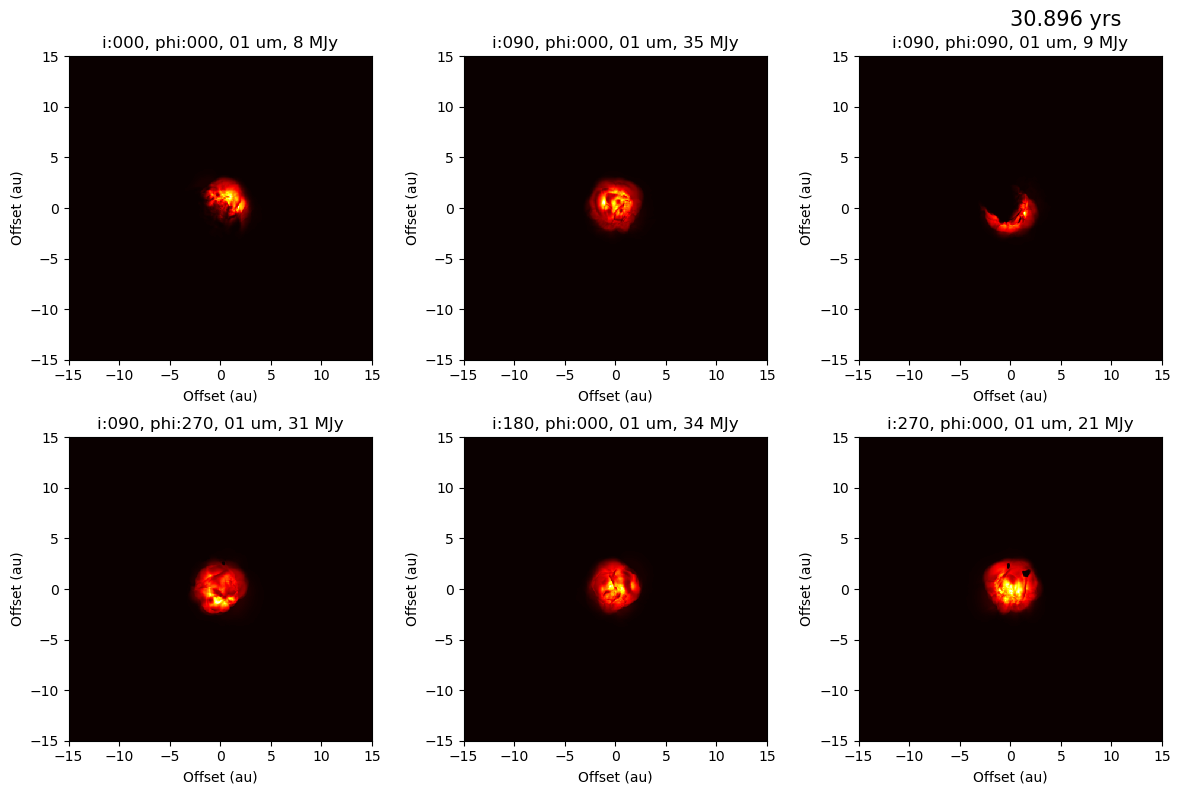

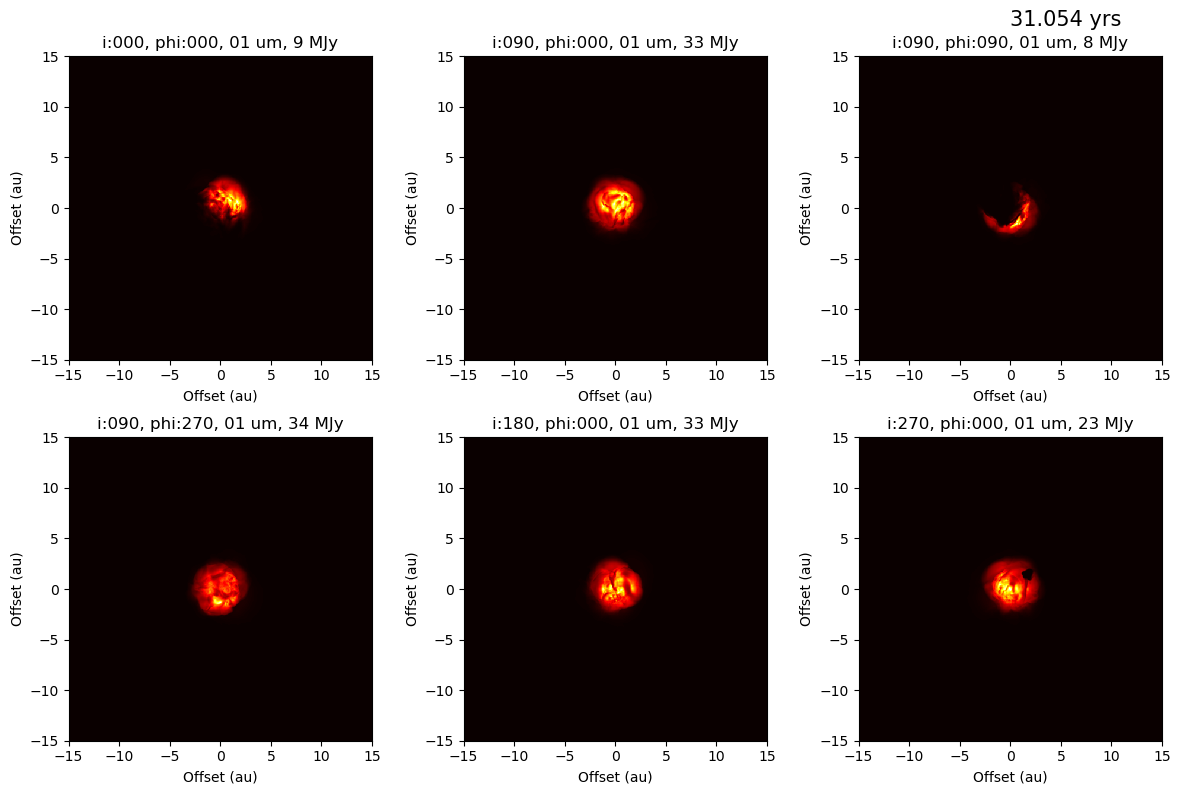

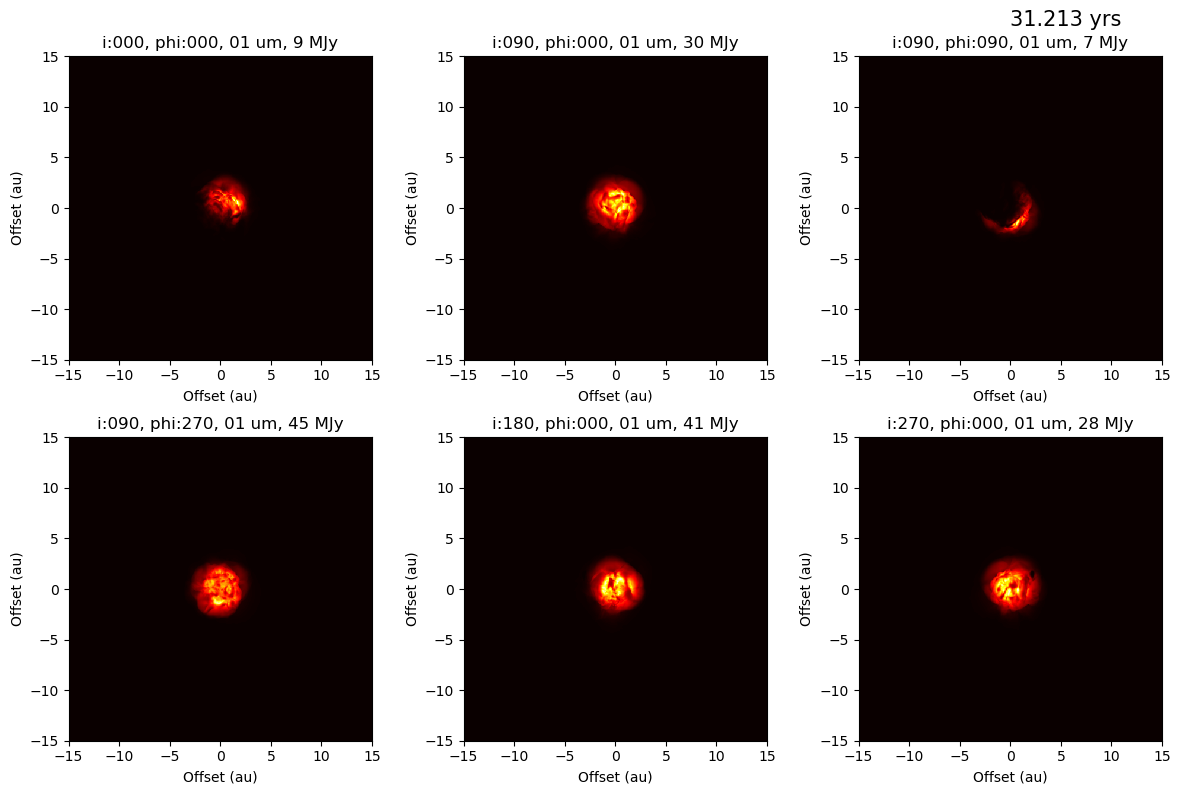

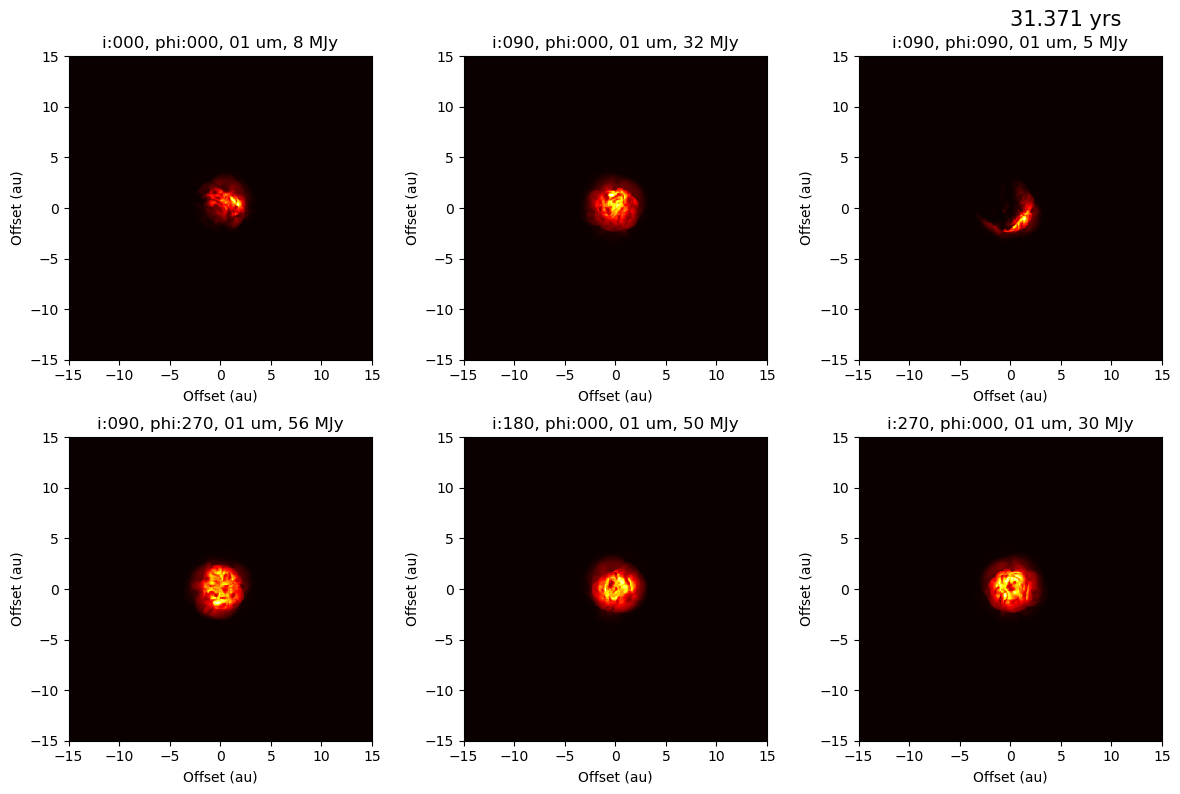

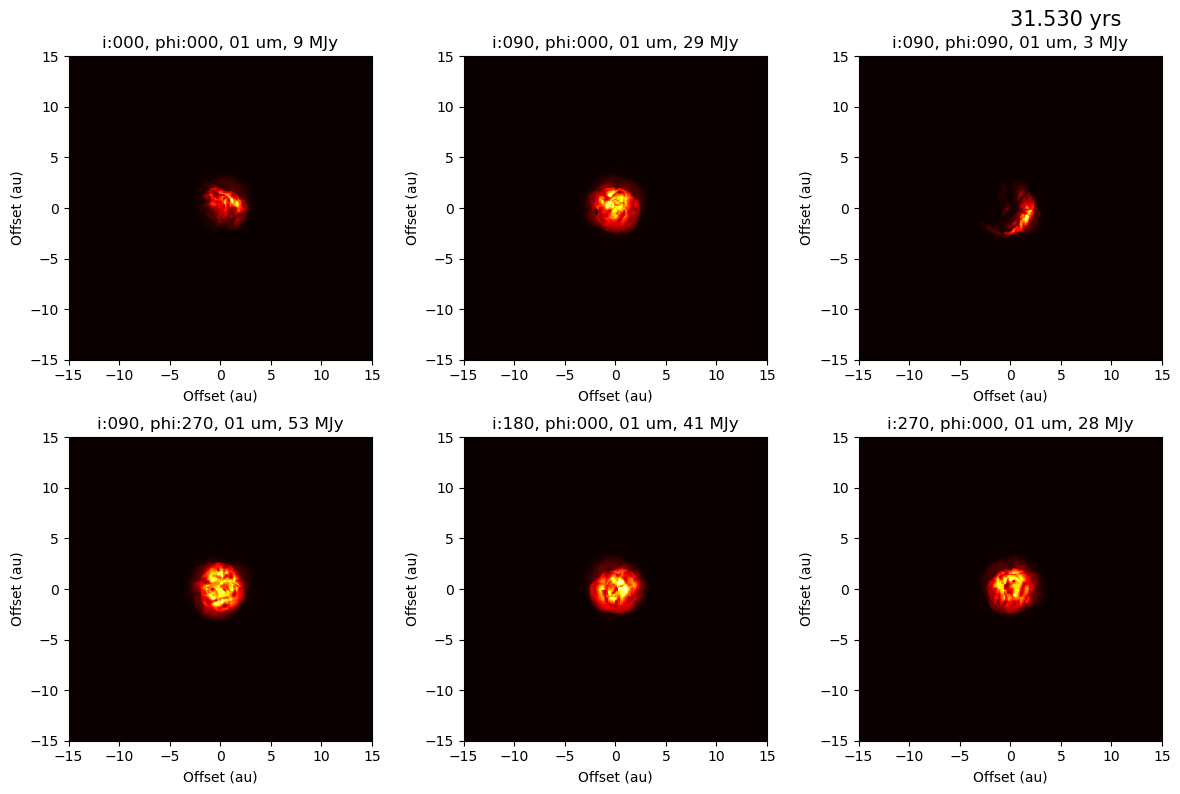

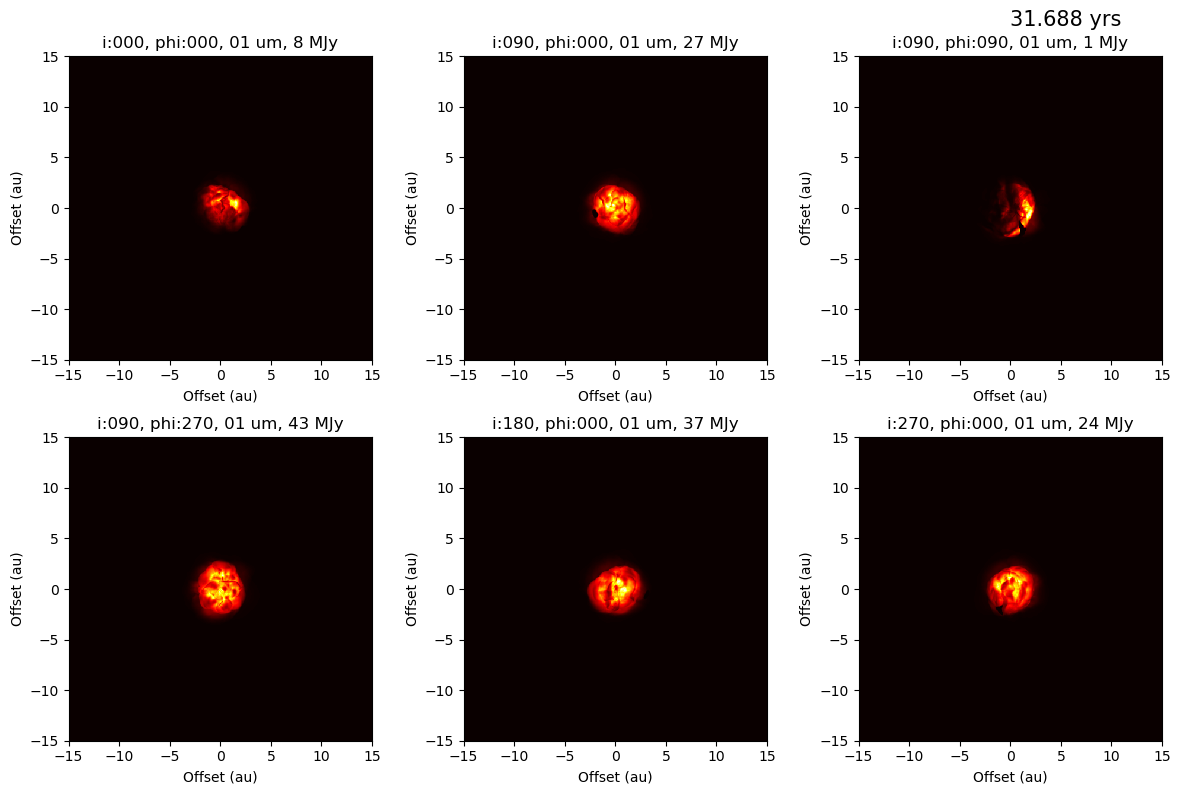

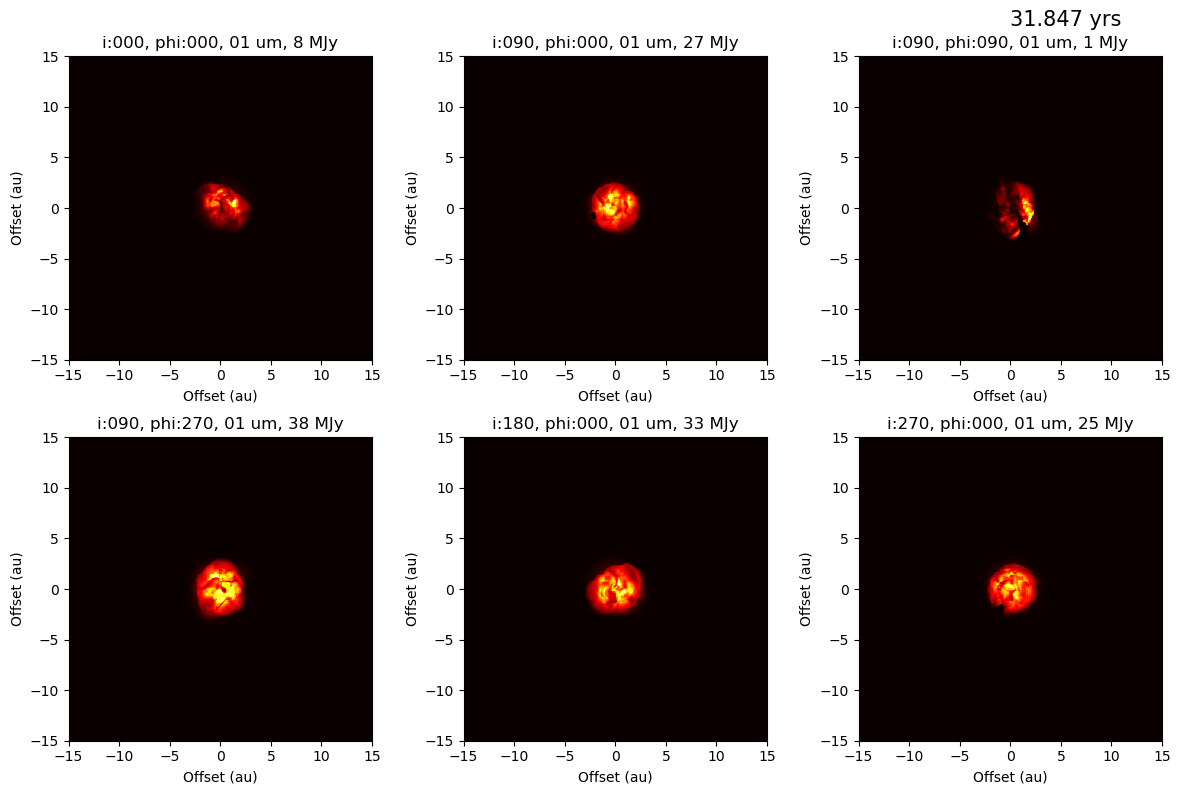

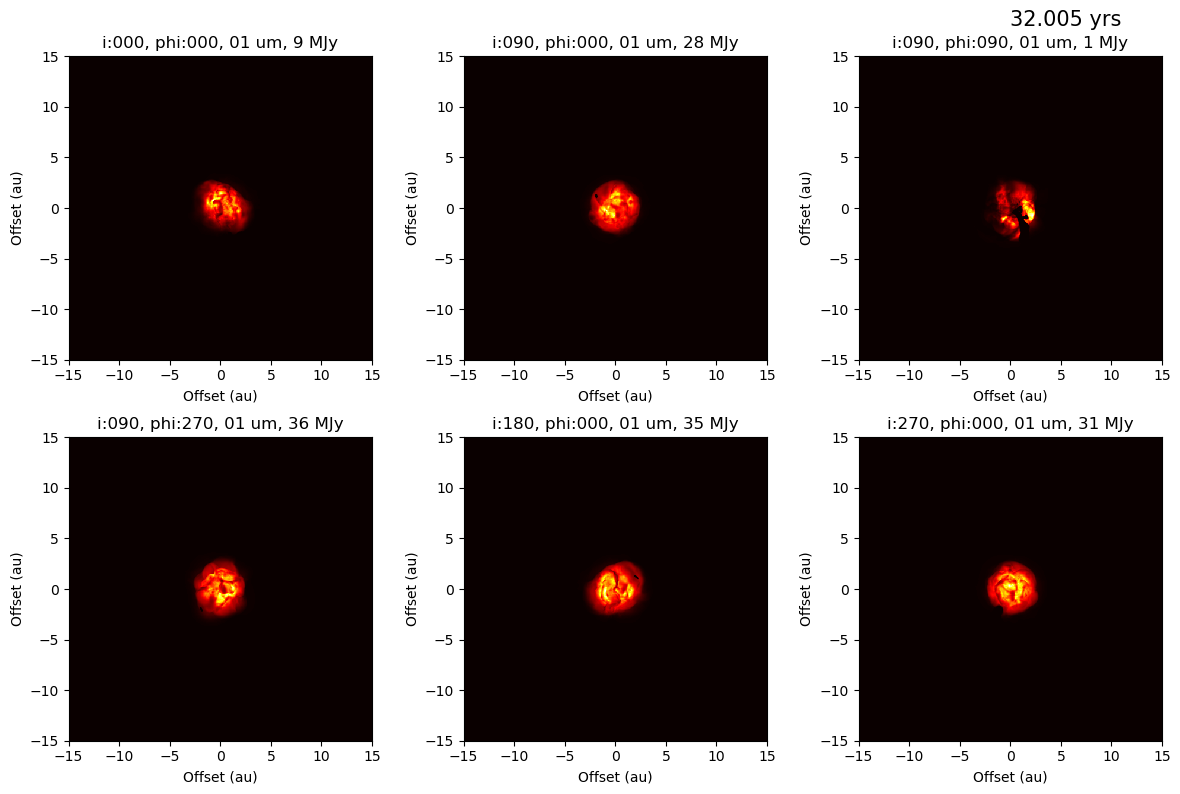

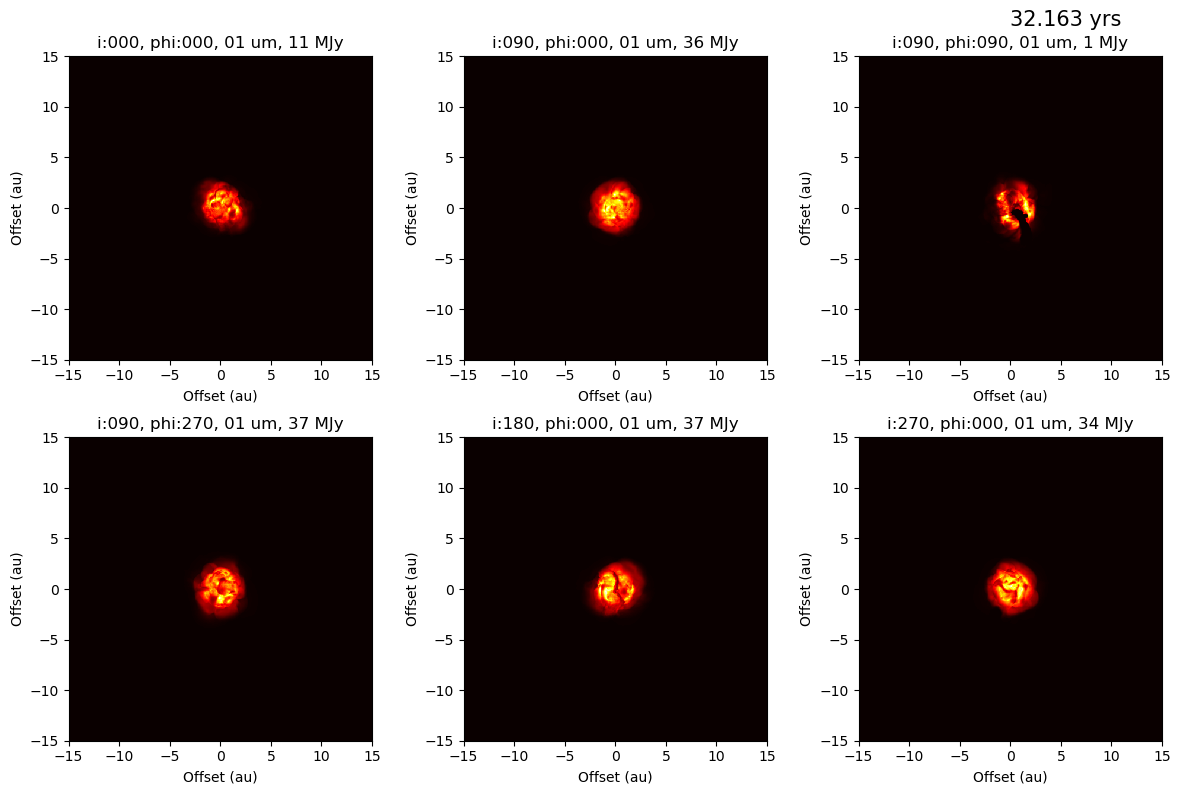

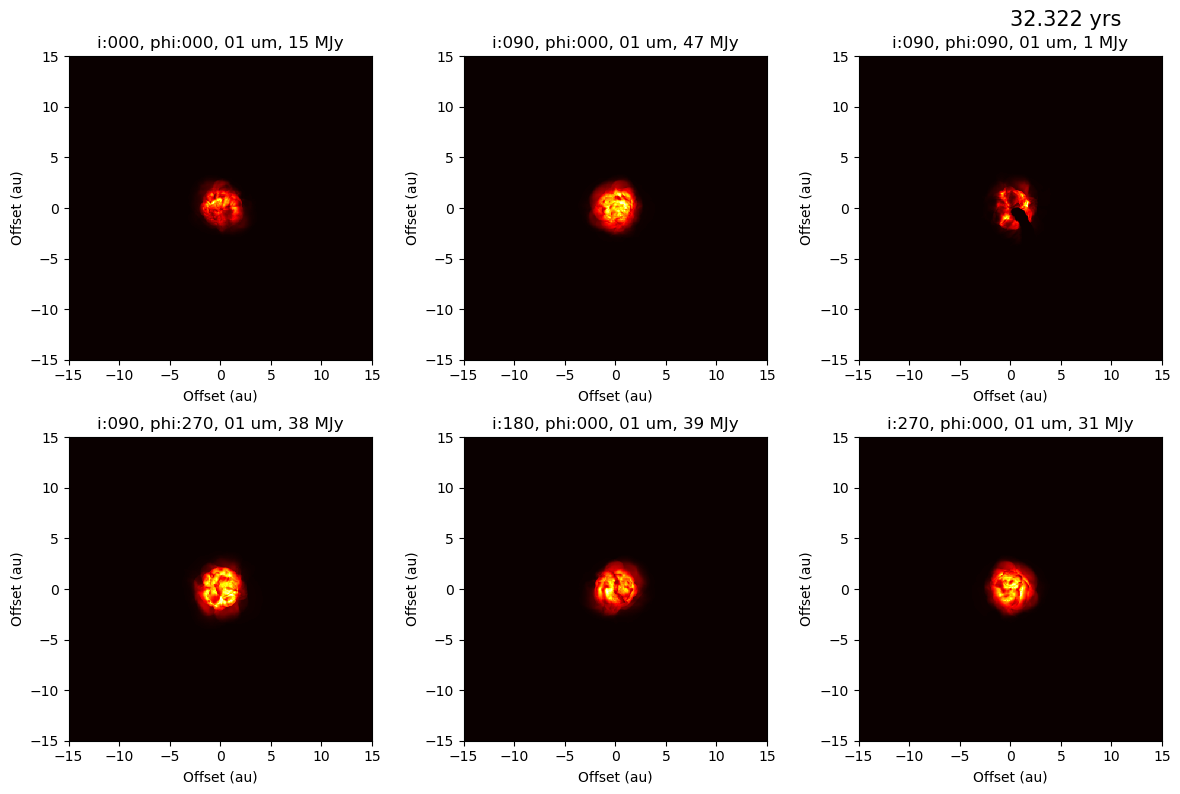

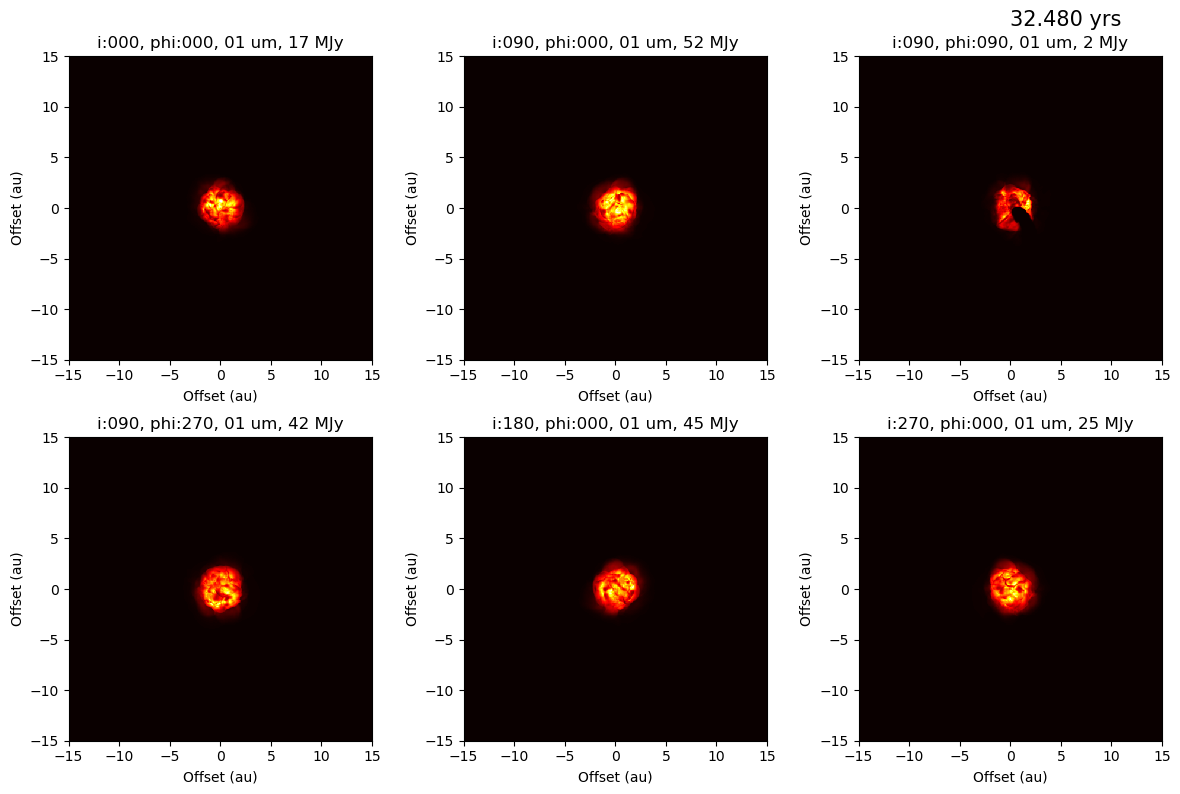

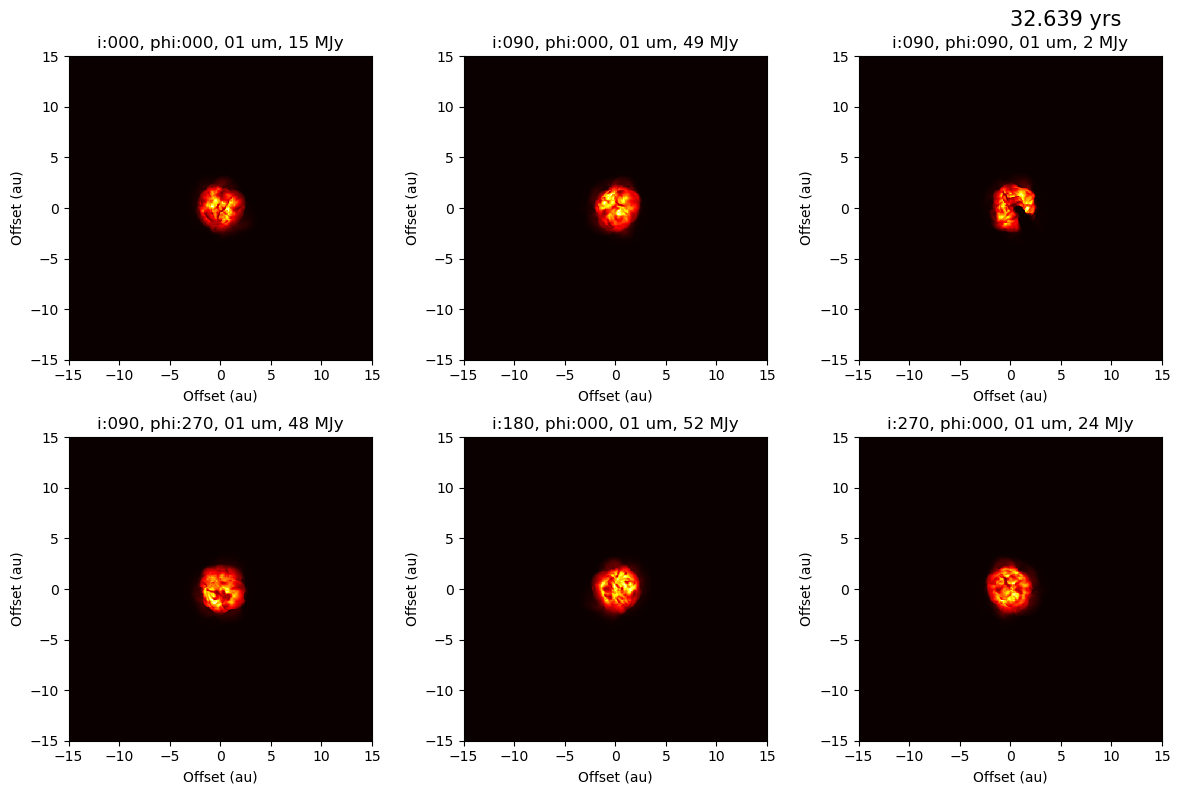

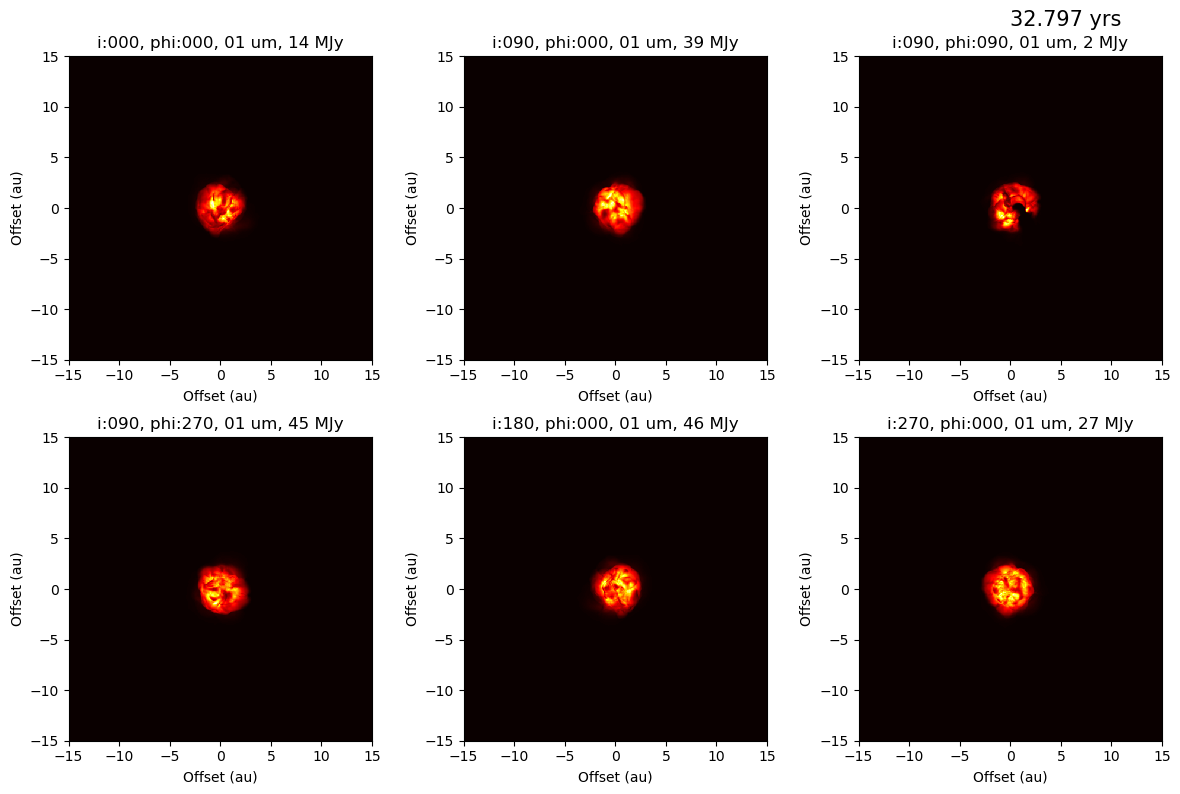

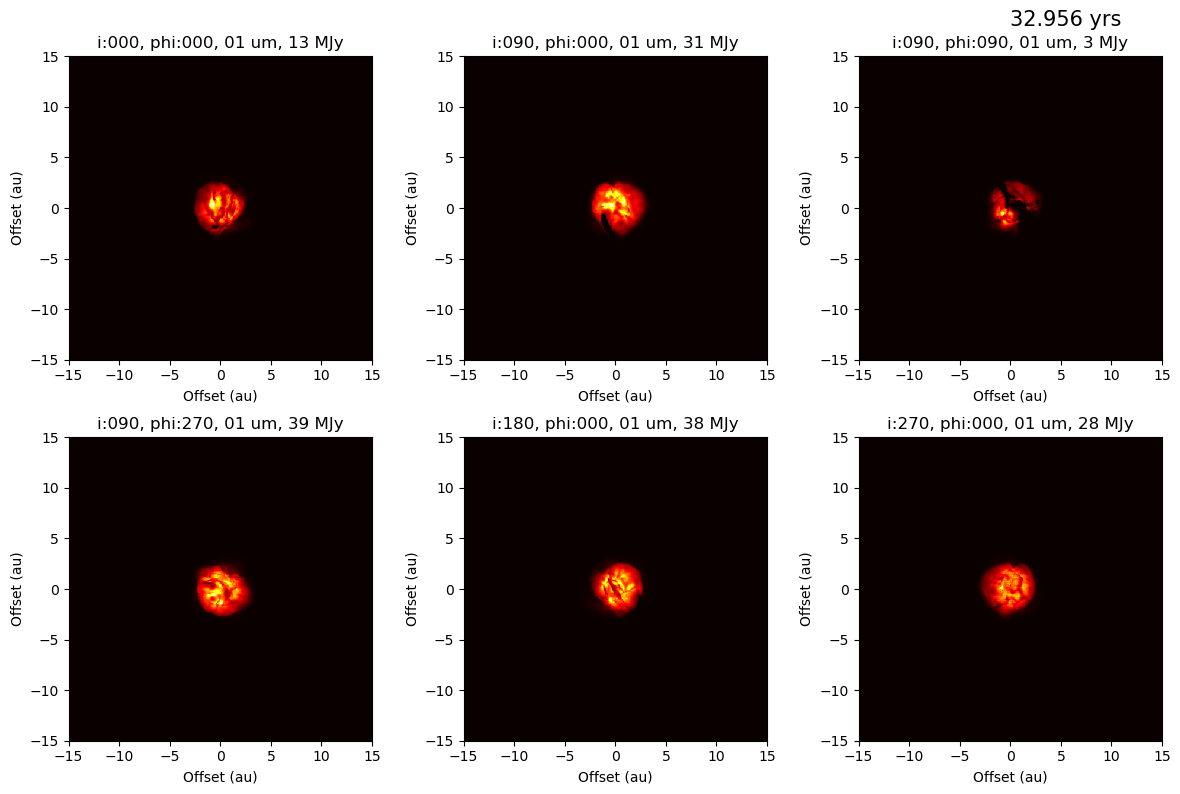

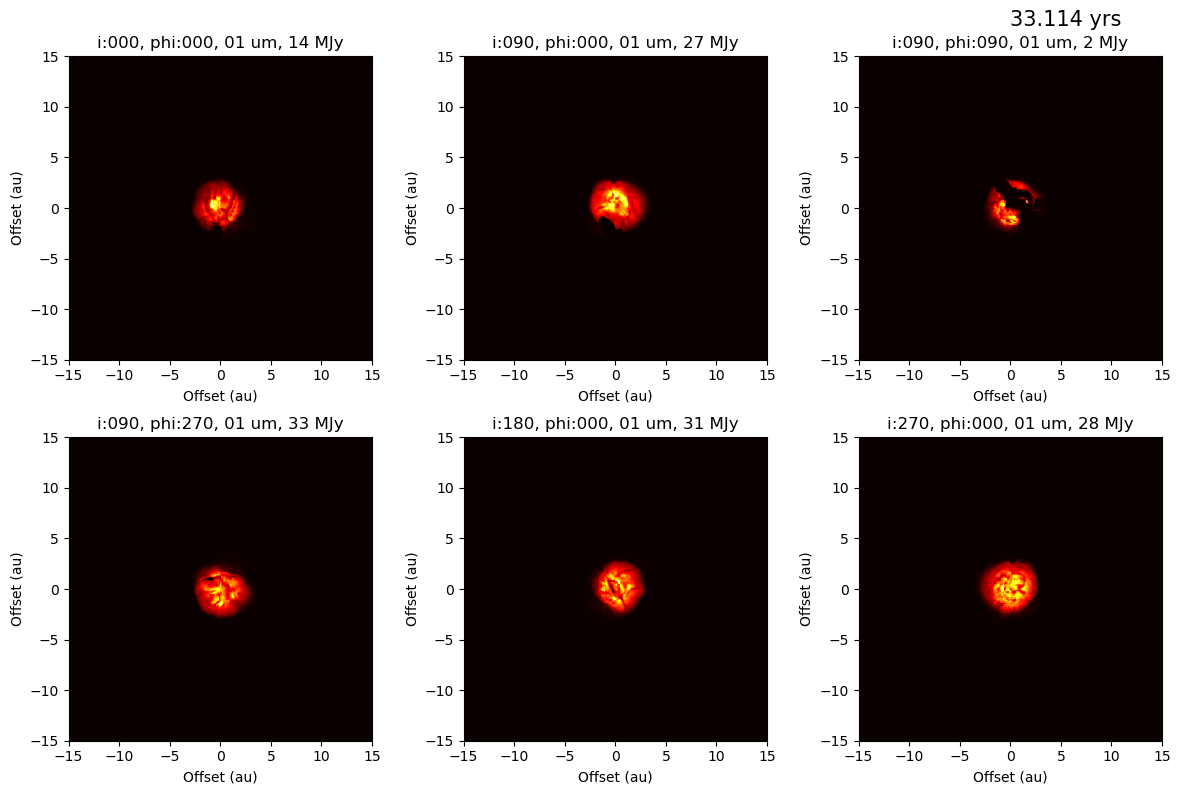

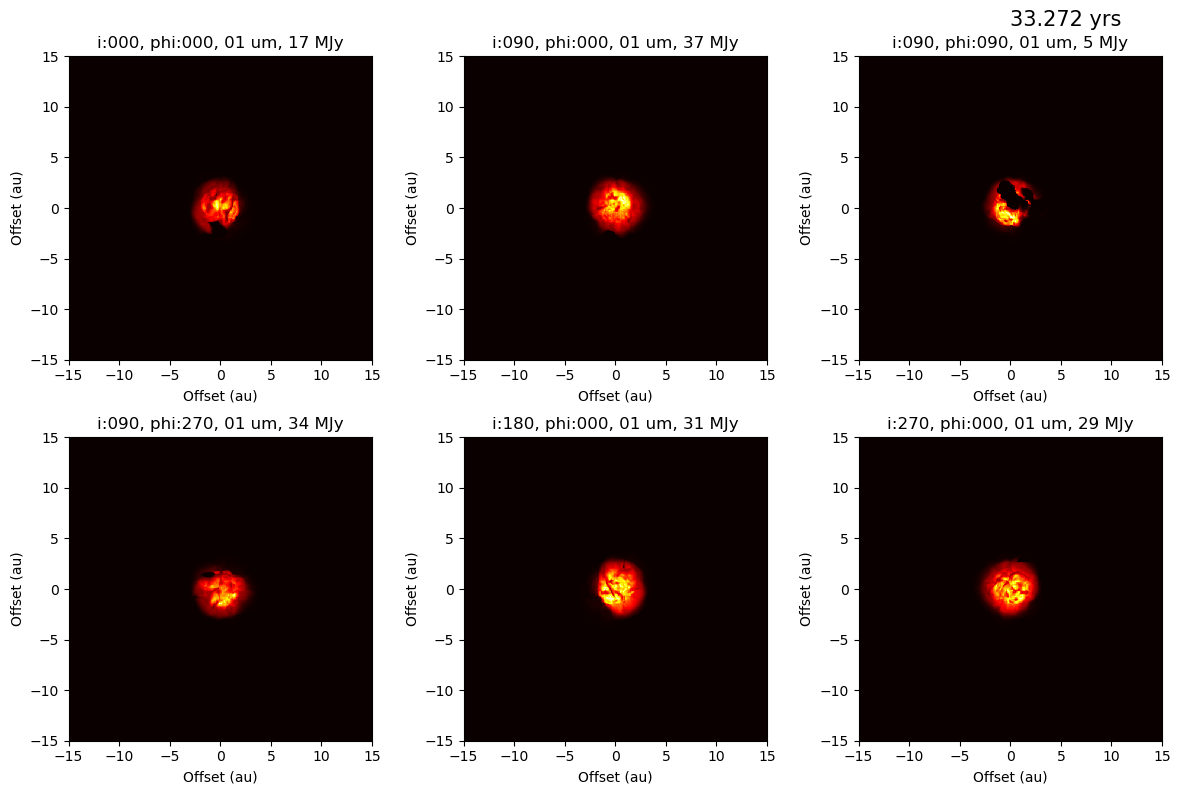

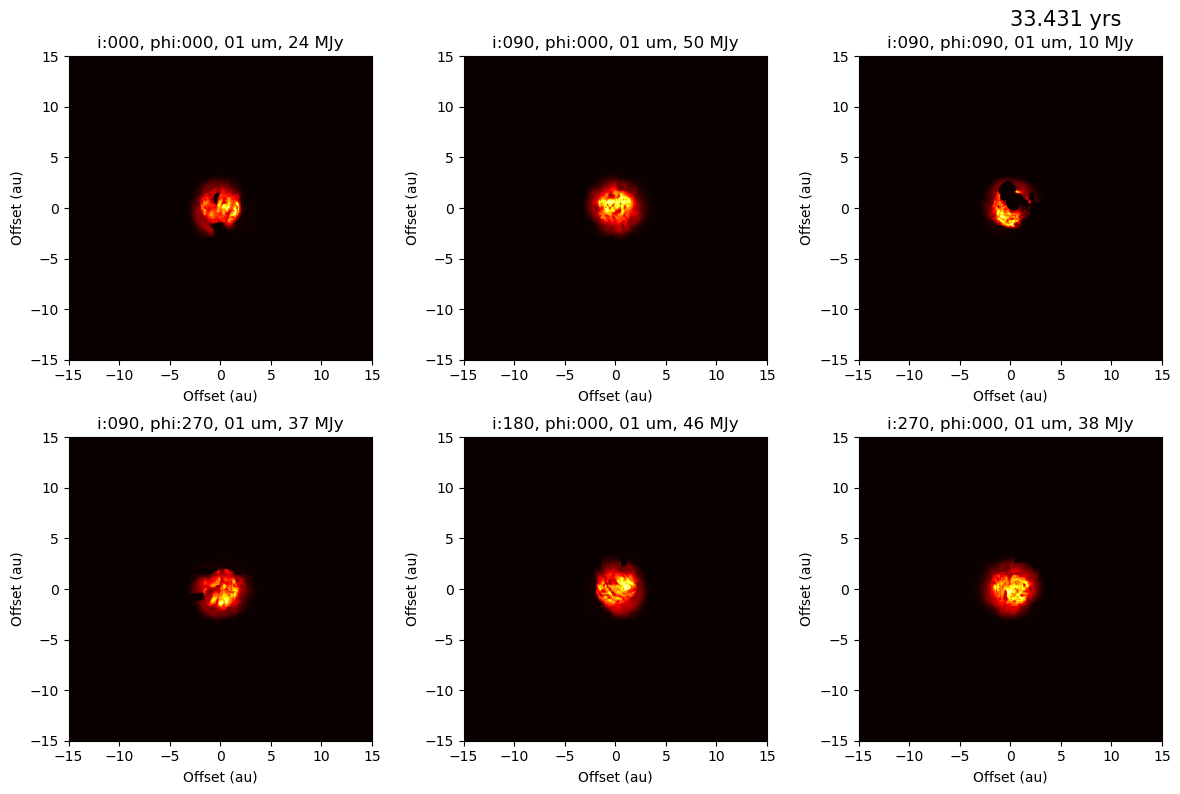

In [2]:
# plot time-series images in all directions
# ie 6 subplots in same fig

import os
import numpy as np
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
from datetime import date

# Set some path settings
wavelength = '01'
path = '../r3dresults/st28gm06n052_timedep_nospikes/'
imagefilenames = [
    f'image_i000_phi000_{wavelength}um.out',
    f'image_i090_phi000_{wavelength}um.out',
    f'image_i090_phi090_{wavelength}um.out',
    f'image_i090_phi270_{wavelength}um.out',
    f'image_i180_phi000_{wavelength}um.out',
    f'image_i270_phi000_{wavelength}um.out'
]

# Create outputfolder
outputfolder = f'../r3dplots/{str(date.today())}_image-6direct-{wavelength}um/'
if os.path.exists(outputfolder) == False:
    os.system(f'mkdir {outputfolder}')

# Extract list of folders from the path folder, and make them to numbers, and sort them!
snapshot_folders = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
snapshot_folders.sort()

# Load snapshot times ([:,1] is years, [:,0] is snapshot number)
snapshot_times = np.loadtxt(path+'snapshot_yr.dat')


# Load all 6 LOSs at a time and save as png's for animation creation
for nsnap,snapshot in enumerate(snapshot_folders):
    # Create list with image paths
    imagepaths = []
    for imagefilename in imagefilenames:
        imagepaths.append(f'{path}{snapshot}/{imagefilename}')

    # Create plot objects with image
    fig, ax = a3d.plot_imagesubplots(
        imagelist = imagepaths
    )
    ax[0][-1].text(
        x=0,y=18,
        s=f'{snapshot_times[nsnap,1]:.3f} yrs',
        backgroundcolor='white',
        fontsize=15
    )

    # Save as PNG's
    fig.tight_layout()
    fig.savefig(f'{outputfolder}{snapshot}_{wavelength}um.png', facecolor='white')



## Plot SEDs

/tmp/ipykernel_25065/443899542.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.figure(
/tmp/ipykernel_25065/443899542.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.figure(
/tmp/ipykernel_25065/443899542.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.figure(
/tmp/ip

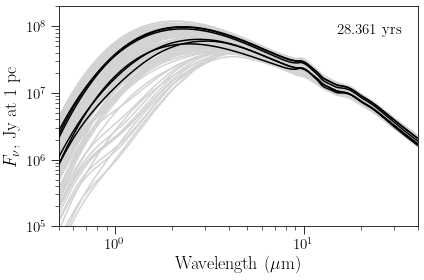

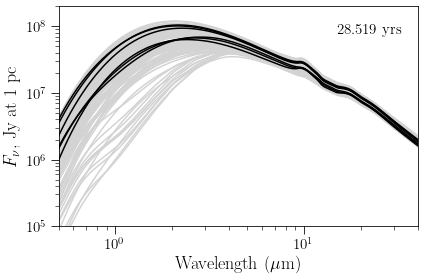

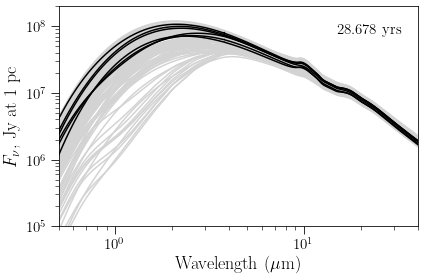

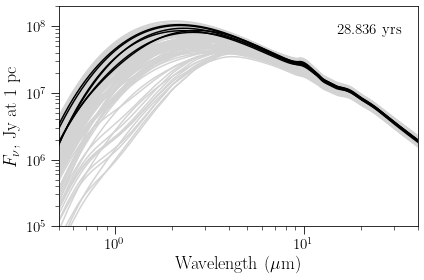

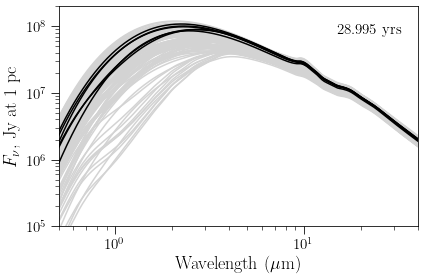

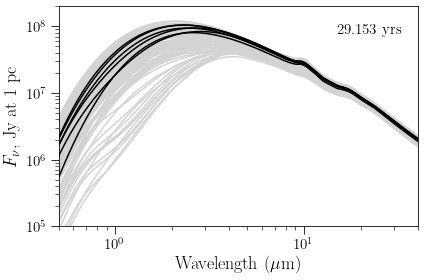

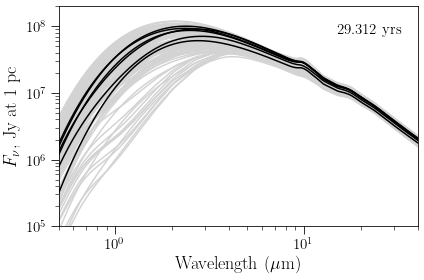

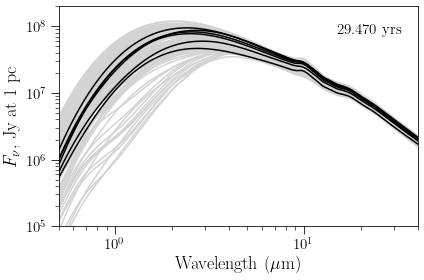

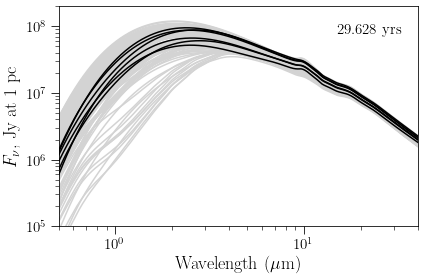

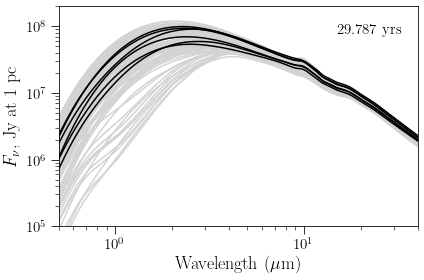

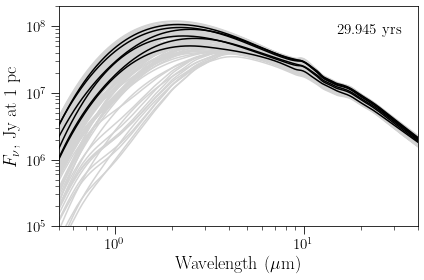

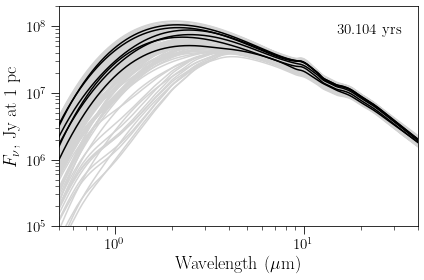

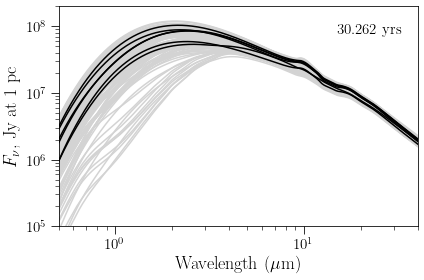

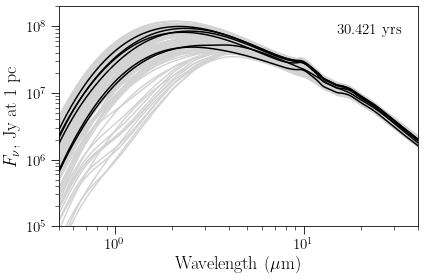

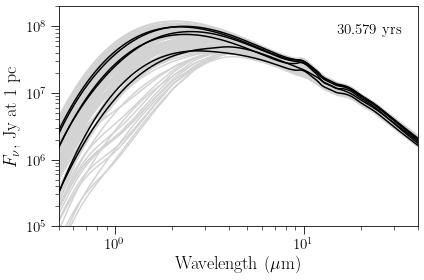

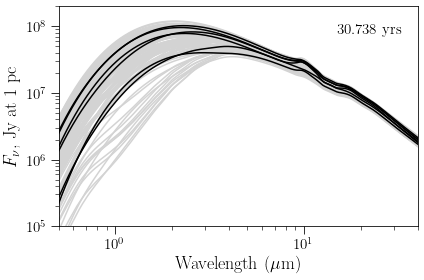

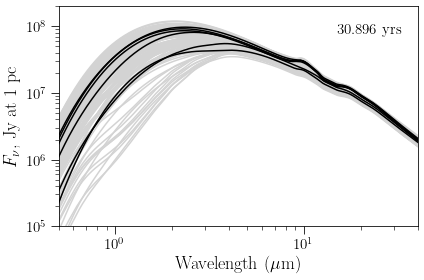

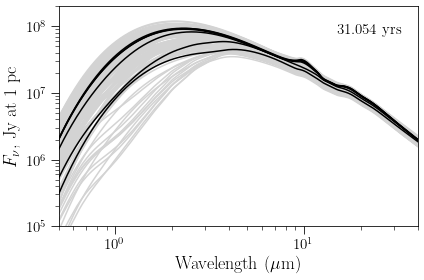

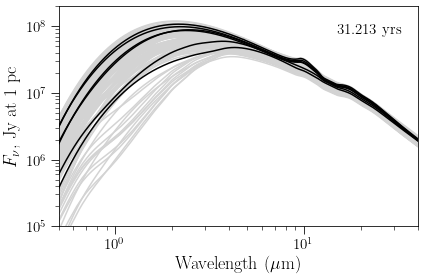

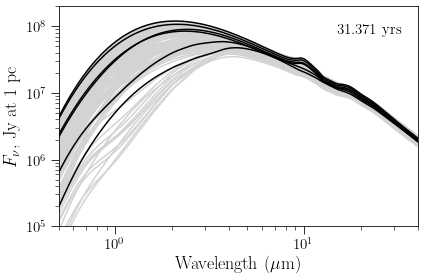

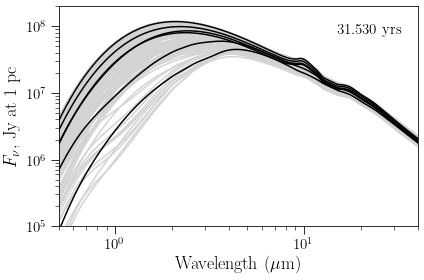

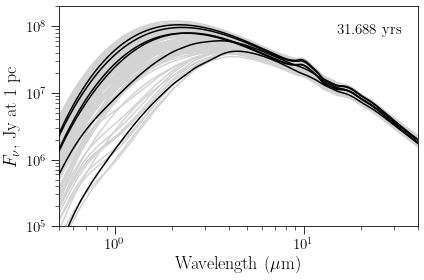

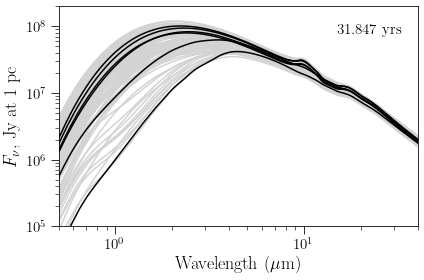

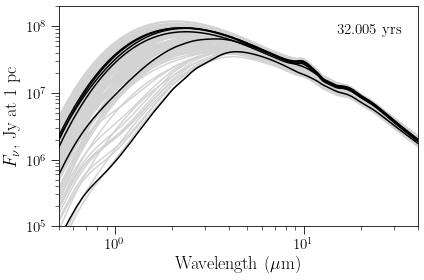

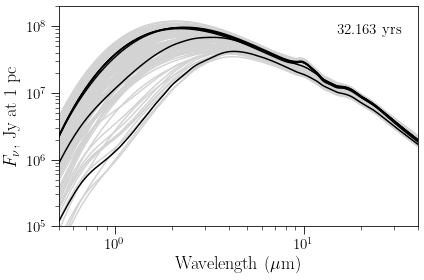

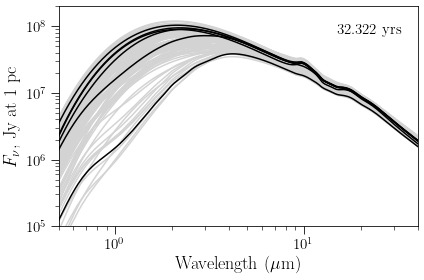

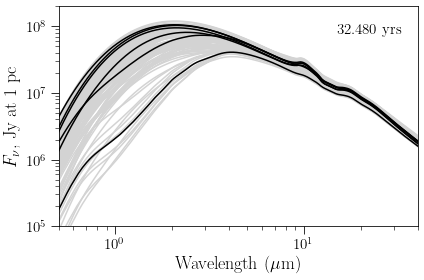

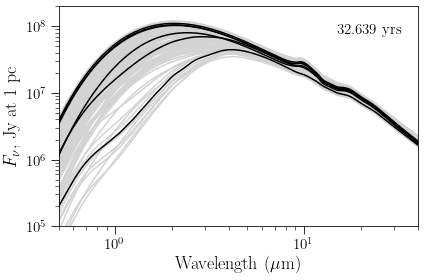

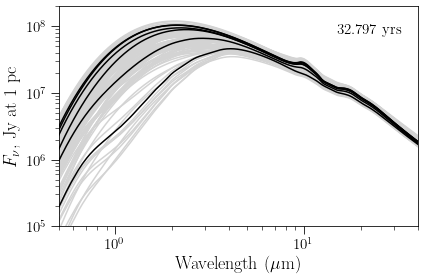

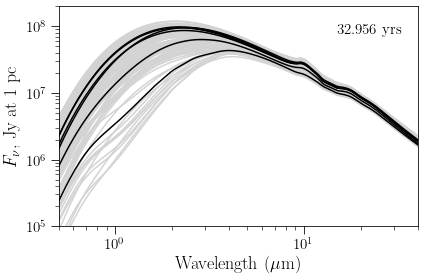

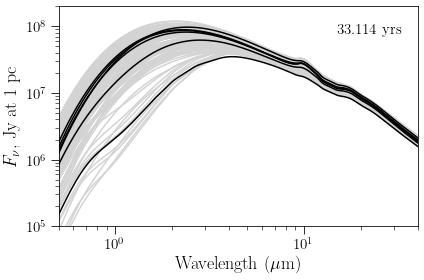

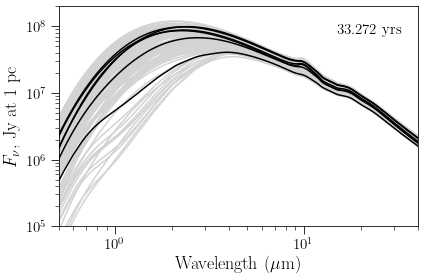

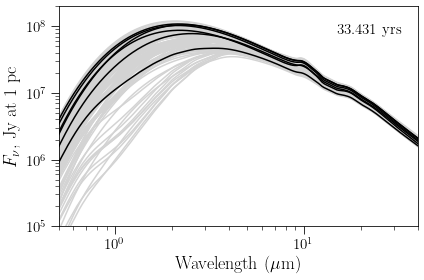

In [13]:
# For talks
# Plot all SEDs in the same figure, highlight one snapshot
# Save SEDs as pngs in todaysdate-'_seds/'
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
from matplotlib import rc

# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

# Set path settings
path = '../r3dresults/st28gm06n052_timedep_nospikes/'

# Create outputfolder
outputfolder = '../r3dplots/'+str(date.today())+'_seds/'
if os.path.exists(outputfolder) == False:
    os.system(f'mkdir {outputfolder}')

# Extract list of folders from the path folder, and make them to numbers, and sort them!
phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
phases.sort()

# Load phase times
phasetimes = np.loadtxt(path+'snapshot_yr.dat')[:,1]

# Set LOS-angles
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
# Loop over high lighted snapshots
for nsnap,hilitsnapshot in enumerate(phases):

    # Set settings for each highlighted snapshotplot
    fig, ax = plt.figure(
        hilitsnapshot, 
        figsize=(6, 4)
    ), plt.axes()
    ax.set(
        xscale='log',
        yscale='log',
        xlim=[0.5,40],
        ylim=[1e5,2e8]
    )
    ax.set_ylabel(r'$F_\nu$, Jy at 1 pc', fontsize=18)
    ax.set_xlabel(r'Wavelength ($\mu$m)',fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=15)

    # Load and plot all SEDs
    for phase in phases:
        for angle in angles:
            if phase != hilitsnapshot:
                wavelength, fluxes = a3d.load_spectrum(
                    path=f'{path}{phase}/spectrum_{angle}.out'
                )
                ax.plot(wavelength,fluxes,'lightgrey')            

    # Load and plot hilite-snapshot
    for angle in angles:
        wavelength, fluxes = a3d.load_spectrum(
            path=f'{path}{hilitsnapshot}/spectrum_{angle}.out'
        )
        ax.plot(wavelength,fluxes,'k')
    # Add textbox with snapshot numer
    ax.text(
        x=15,y=8e7,
        s=f'{phasetimes[nsnap]:.3f} yrs',
        backgroundcolor='white',
        fontsize=15
    )
    # Save each in a separate file, for talks and suchs
    fig.tight_layout()
    fig.savefig(
        f'../r3dplots/{outputfolder}/seds_{hilitsnapshot}.png', 
        dpi=300, 
        facecolor='white'
    )




## Plot various time-dep-plots

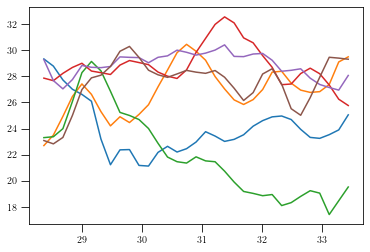

In [15]:
# Plot time-dependent plots
# 1. Plot F10(time)
import os
import numpy as np
import matplotlib.pyplot as plt
import analyze_r3d_functions as a3d
from matplotlib import rc

# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

wavelength = 10
path = '../r3dresults/st28gm06n052_timedep_nospikes/'
phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
phases.sort()
Nphases = len(phases)
phasetimes = np.loadtxt(path+'snapshot_yr.dat')[:Nphases,1]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
# Load wavelengthgrid and extract index for 10um
wavelengths,spectrum = a3d.load_spectrum(
    path = f'{path}{phases[0]}/spectrum_{angles[0]}.out'
)
wavelengths = np.array(wavelengths)
index10um = int(np.where(wavelengths >= wavelength)[0][0]-1)

# Loop through all phases and extract all flux densities at 10um
for angle in angles:
    f10 = []
    for nphase,phase in enumerate(phases):

        wavelengths,spectrum = a3d.load_spectrum(
            path = f'{path}{phase}/spectrum_{angle}.out'
        )
        f10.append(spectrum[index10um]*1e-6)
    
    # Plot each angles time dependent F10 in MJy
    plt.plot(phasetimes,f10)


# Plot only Fstar(10)










In [19]:
# Extract luminosity of all spectra in Lsol
import os
import numpy as np
import matplotlib.pyplot as plt
import analyze_r3d_functions as a3d
from matplotlib import rc

Lsol = 3.828e26 # Watt

path = '../r3dresults/st28gm06n052_timedep_nospikes/'
phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
phases.sort()
Nphases = len(phases)
phasetimes = np.loadtxt(path+'snapshot_yr.dat')[:Nphases,1]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
# Start printing output stuff
print(f'#     {angles}      Average')


# Loop through time
for phase in phases:

    # Declare an LOS-average luminosity
    lumaverage = 0
    # and a lift for lums in direction
    luminosities = []

    # Loop through angles
    for angle in angles:

        
        luminosity = a3d.compute_sed_luminosity(
            path = f'{path}{phase}/spectrum_{angle}.out'
        )/Lsol
        lumaverage += luminosity
        luminosities.append(luminosity)

    lumaverage /= 6
    print(f'{phase}  {luminosities}     {lumaverage:.3f}')


# TODO
# fixa fint detta!




     ['i000_phi000', 'i090_phi000', 'i090_phi090', 'i090_phi270', 'i180_phi000', 'i270_phi000']      Average
180  [7261.662534521053, 3653.7912121286645, 3947.3627871341046, 7103.251635338793, 7497.7022717971895, 4243.3579906707755]     5617.855
181  [8404.289717040732, 4616.5713229373305, 4642.7399552948655, 8397.747593786522, 7198.492940759391, 4728.975431147269]     6331.469
182  [7757.715613786664, 5415.4781772843335, 5303.572372797707, 8851.828852455645, 7240.398063579417, 5233.344428445442]     6633.723
183  [6798.234767500899, 5804.145699094134, 6519.023160458012, 8415.434978230782, 8048.573458901866, 5729.624553766545]     6885.839
184  [5700.848240230026, 5841.948922285629, 7365.490296743607, 7557.628977758683, 8257.748249455868, 5991.8586894359005]     6785.921
185  [5072.843726273551, 5226.403908248217, 7912.2332950805285, 6699.799367392119, 7659.2217617664455, 6355.416763588612]     6487.653
186  [3699.1103860507756, 4333.239286405363, 6902.0717963861525, 5995.461505855026,

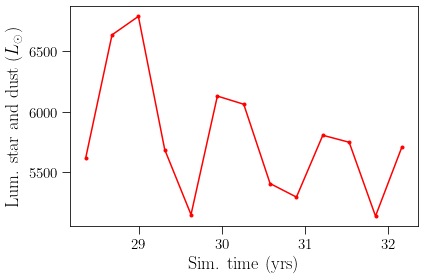

In [5]:
# 2. Plot dust+star luminosity
lum_stardust = [
    5617.871194359986,
    6633.722918058202,
    6785.920562651619,
    5687.3909685335,
    5151.778144169866,
    6129.110849259379,
    6061.731901585908,
    5408.1797066572335,
    5296.339394344028,
    5806.050427533794,
    5748.371539886178,
    5139.452976051304,
    5707.024558504942,
]
fig, ax = plt.figure(num=2, figsize=(6, 4)), plt.axes()
ax.plot(phasetimes,lum_stardust,'r-')
ax.plot(phasetimes,lum_stardust,'r.')
ax.set_xlabel(r'Sim. time (yrs)',fontsize=18);
ax.set_ylabel(r'Lum. star and dust ($L_\odot$)',fontsize=18);
ax.tick_params(axis='both', which='major', labelsize=15)
fig.tight_layout()
fig.savefig(
    'figs/timedep_stardustlum.pdf',
    dpi=300,
    facecolor='white'
)


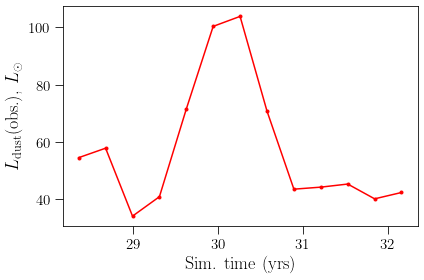

In [1]:
# Plot L(t) of tail of Fduststar - BBfit, only positive data!
# BB is normalised to the peak of the SED (temperature and flux density)
# The luminosity is taken of everything with lambda > peak of the SED!
# Measure the total flux density of those lines 
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

Lsol = 3.828e26 # Watt

folder = '../r3dresults/st28gm06n052_timedep_nospikes/'
phases = [
    '180',
    '182',
    '184',
    '186',
    '188',
    '190',
    '192',
    '194',
    '196',
    '198',
    '200',
    '202',
    '204',
]
phasetimes = [
    28.361,
    28.678,
    28.995,
    29.312,
    29.628,
    29.945,
    30.262,
    30.579,
    30.896,
    31.213,
    31.530,
    31.847,
    32.163,
]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
L_Si = np.zeros(len(phases))


# Loop over snapshots and angles
for nphase,phase in enumerate(phases):

    # Reset Si emission summation
    Lum_Si_sum = 0

    for nangle,angle in enumerate(angles):
        # Load all SEDs
        wavelength, fluxes = a3d.load_spectrum(
            path=f'{folder}{phase}/spectrum_{angle}.out'
        )
        # Fit a black body to SED peak
        N_maxflux = np.argmax(fluxes)
        BBfit = a3d.compute_blackbody_freq(
            peak_flux = np.max(fluxes),
            peak_wavelength = wavelength[N_maxflux],
            wavelengths = wavelength
        )
        # Subtract BB from SEDs and save sum of (positive)
        # flux densities after the SED peak.
        dust_emission = fluxes - BBfit

        # Extract dusty SED (with only positive fluxes)
        F_Si_sed = []
        for nwave,flux in enumerate(dust_emission[N_maxflux:]):
            if flux >= 0:
                F_Si_sed.append(flux)
            else:
                F_Si_sed.append(0.0)

        # And sum together lum(Lsol) of each SED
        # Extract dusty SED (with only positive fluxes)
        Lum_Si_sum += a3d.compute_luminosity(
            wavelengths = wavelength[N_maxflux:],
            spectrum = F_Si_sed
        )/Lsol
    # Take the LOS average of this
    L_Si[nphase] = Lum_Si_sum/6


# Plot and save
fig, ax = plt.figure(num=1, figsize=(6, 4)), plt.axes()
ax.plot(phasetimes,L_Si,'r-')
ax.plot(phasetimes,L_Si,'r.')
ax.set_xlabel(r'Sim. time (yrs)',fontsize=18);
ax.set_ylabel(r'$L_{\rm dust}$(obs.), $L_\odot$',fontsize=18);
ax.tick_params(axis='both', which='major', labelsize=15)
fig.tight_layout()
fig.savefig(
    'figs/timedep_dustlum_observed.pdf',
    dpi=300,
    facecolor='white'
)

In [ ]:
# Plot L(t) of tail of Fduststar - Fstar-tail
# with Fstar-tail normalised to the Fduststar-flux densities at peak of Fduststar
# Another way to measure the total flux of the dust emission
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

Lsol = 3.828e26 # Watt

folderdust = '../r3dresults/st28gm06n052_timedep_nospikes/'
folderstar = '../r3dresults/st28gm06n052_timedep_nodust/'
phases = [
    '180',
    '182',
    '184',
    '186',
    '188',
    '190',
    '192',
    '194',
    '196',
    '198',
    '200',
    '202',
    '204',
]
phasetimes = [
    28.361,
    28.678,
    28.995,
    29.312,
    29.628,
    29.945,
    30.262,
    30.579,
    30.896,
    31.213,
    31.530,
    31.847,
    32.163,
]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
L_Si = np.zeros(len(phases))

# TODO HÄR ÄR JAG
# Plotta SEDerna jag testkör med först och sen residualen


# Loop over snapshots and angles
for nphase,phase in enumerate(phases):

    # Reset Si emission summation
    Lum_Si_sum = 0

    for nangle,angle in enumerate(angles):
        # Load all SEDs
        wavelength, fluxes = a3d.load_spectrum(
            path=f'{folder}{phase}/spectrum_{angle}.out'
        )
        # Fit a black body to SED peak
        N_maxflux = np.argmax(fluxes)
        BBfit = a3d.compute_blackbody_freq(
            peak_flux = np.max(fluxes),
            peak_wavelength = wavelength[N_maxflux],
            wavelengths = wavelength
        )
        # Subtract BB from SEDs and save sum of (positive)
        # flux densities after the SED peak.
        dust_emission = fluxes - BBfit

        # Extract dusty SED (with only positive fluxes)
        F_Si_sed = []
        for nwave,flux in enumerate(dust_emission[N_maxflux:]):
            if flux >= 0:
                F_Si_sed.append(flux)
            else:
                F_Si_sed.append(0.0)

        # And sum together lum(Lsol) of each SED
        Lum_Si_sum += a3d.compute_luminosity(
            wavelengths = wavelength[N_maxflux:],
            spectrum = F_Si_sed
        )/Lsol
    # Extract dusty SED (with only positive fluxes)
    L_Si[nphase] = Lum_Si_sum/6


# Plot and save
fig, ax = plt.figure(num=1, figsize=(6, 4)), plt.axes()
ax.plot(phasetimes,L_Si,'r-')
ax.plot(phasetimes,L_Si,'r.')
ax.set_xlabel(r'Sim. time (yrs)',fontsize=18);
ax.set_ylabel(r'$L_{\rm dust}$(obs.), $L_\odot$',fontsize=18);
ax.tick_params(axis='both', which='major', labelsize=15)
fig.tight_layout()
fig.savefig(
    'figs/timedep_dustlum_observed.pdf',
    dpi=300,
    facecolor='white'
)



In [ ]:
# For talks
# Load F10 and F14 data of all SEDs and plot
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

folder = '../r3dresults/st28gm06n052_timedep_nospikes/'
phases = [
    '180',
    '182',
    '184',
    '186',
    '188',
    '190',
    '192',
    '194',
    '196',
    '198',
    '200',
    '202',
    '204',
]
phasetimes = [
    28.361,
    28.678,
    28.995,
    29.312,
    29.628,
    29.945,
    30.262,
    30.579,
    30.896,
    31.213,
    31.530,
    31.847,
    32.163,
]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
Ften = np.zeros(len(phases))
Ffourteen = np.zeros(len(phases))

# Loop over snapshots and angles
for nphase,phase in enumerate(phases):
    Ften_sum = 0
    Ffourteen_sum = 0

    for angle in angles:
        # Load all SEDs
        wavelength, fluxes = a3d.load_spectrum(
            path=f'{folder}{phase}/spectrum_{angle}.out'
        )
        
        # Extract index of 10 and 14 um
        tenmicron = np.argwhere(np.array(wavelength) >= 10)[0][0]-1
        fourteenmicron = np.argwhere(np.array(wavelength) >= 14)[0][0]

        # Save average flux densities of 10 and 14 um
        Ften_sum += fluxes[tenmicron]
        Ffourteen_sum += fluxes[fourteenmicron]
    
    # Take LOS averaged fluxes
    Ften[nphase] = Ften_sum/len(angles)
    Ffourteen[nphase] = Ffourteen_sum/len(angles)

# Plot
# F10 only
fig, ax = plt.figure(num=1, figsize=(6, 4)), plt.axes()
ax.plot(phasetimes,Ften,'g-')
ax.plot(phasetimes,Ften,'g.')
ax.set_xlabel(r'Sim. time (yrs)',fontsize=18);
ax.set_ylabel(r'$F(10\,\mu$m$)$, Jy at 1\,pc',fontsize=18);
ax.tick_params(axis='both', which='major', labelsize=15)
fig.tight_layout()
fig.savefig(
    'figs/timedep_F10.pdf',
    dpi=300,
    facecolor='white'
)

# F10 minus F14
fig, ax = plt.figure(num=2, figsize=(6, 4)), plt.axes()
ax.plot(phasetimes,Ften-Ffourteen,'g-')
ax.plot(phasetimes,Ften-Ffourteen,'g.')
ax.set_xlabel(r'Sim. time (yrs)',fontsize=18);
ax.set_ylabel(r'$F(10\,\mu$m$) - F(14\,\mu$m$))$, Jy at 1\,pc',fontsize=18);
ax.tick_params(axis='both', which='major', labelsize=15)
fig.tight_layout()
fig.savefig(
    'figs/timedep_F10minusF14.pdf',
    dpi=300,
    facecolor='white'
)
# F10 divided F14
fig, ax = plt.figure(num=3, figsize=(6, 4)), plt.axes()
ax.plot(phasetimes,Ften/Ffourteen,'g-')
ax.plot(phasetimes,Ften/Ffourteen,'g.')
ax.set_xlabel(r'Sim. time (yrs)',fontsize=18);
ax.set_ylabel(r'$F(10\,\mu$m$) / F(14\,\mu$m$))$',fontsize=18);
ax.tick_params(axis='both', which='major', labelsize=15)
fig.tight_layout()
fig.savefig(
    'figs/timedep_F10divideF14.pdf',
    dpi=300,
    facecolor='white'
)